In [9]:
import jieba
import re
import csv
 
# 创建停用词列表
def stopwordslist():
    stopwords = [line.strip() for line in open('D:/python/lda/stop_dic/stopwords.txt',encoding='UTF-8').readlines()]
    return stopwords

In [10]:
 
def processing(text):
    """
    数据清洗, 可以根据自己的需求进行重载
    """
    #text = re.sub("@.+?( |$)", "", text)           # 去除 @xxx (用户名)
    #text = re.sub("【.+?】", "", text)             # 去除 【xx】 (里面的内容通常都不是用户自己写的)
    text = re.sub(".*?:", "", text)                #去除微博用户的名字
    #text = re.sub("#.*#", "", text)                #去除话题引用
    text = re.sub("\n","",text)
    return text

In [11]:
# 对句子进行中文分词
def seg_depart(sentence):
    jieba.load_userdict('D:/python/lda/stop_dic/dict.txt')
    sentence_depart = jieba.cut(sentence.strip())
    print(sentence_depart)
    stopwords = stopwordslist()        # 创建一个停用词列表
    outstr = ''        # 输出结果为outstr
    for word in sentence_depart:          # 去停用词
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr

In [13]:
# 给出文档路径
filename = "D:/python/lda/data/data.csv"   #原文档路径
outputs = open("D:/python/lda/data/data_output.csv", 'w', encoding='UTF-8')  #输出文档路径
with open(filename, 'r', encoding='utf-8-sig') as csvfile:
    reader = csv.reader(csvfile,delimiter=',',quotechar='"',doublequote=False)
    for line in reader:
        print(line[0])     #微博在文档的第一列
        line = processing(line[0])
        line_seg = seg_depart(line)
        outputs.write(line_seg + '\n')
outputs.close()
print("分词成功！！！")

内容
<generator object Tokenizer.cut at 0x0000026D9E1E17B0>
“有的时候要自己找原因，这么多年了有没有认真工作工资涨没涨”李佳琦，你怎么好意思说这种话 ​
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
李佳琦力挺花西子，有弹幕说越来越贵了。李佳琦：不要乱说，眉笔一直79，国货品牌很难的，有时候找找自己原因，这么多年了工资涨没涨，有没有认真工作？#李佳琦 花西子# L君君的旅行日记的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
#李佳琦直播间怼网友# 79块钱0.24g的眉笔，哪里不贵了，贵不贵是消费者的主观判断，难道现在消费者连说贵的权利都没有了吗？网友说花西子越来越贵，你说没有就好了，或者说原材料涨价了所以贵了，对着网友一通爹味说教，让别人反思自己工资为什么不涨，为什么不努力工作涨工资？何不食肉糜的具象化，共情资本，面刺在你直播间花钱的姐妹们，李佳琦，你别太爱花西子哦 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
#李佳琦 花西子#李佳琦回怼说花西子很贵的网友：“哪里贵了？这么多年都是这个价格，花西子不是那种随便买原料就做的品牌，这么多年都是79，有的时候是自己的原因，这么多年了工资涨没涨？有没有认真工作？ ”这很难评…… #李佳琦带货怼网友# L拉布拉蝶儿的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
#李佳琦变了吗#后续来了，关于李佳琦说花西子眉笔的后续 ，#李佳琦就直播言论致歉#,#李佳琦 花西子# L可乐de分享的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
#李佳琦花西子#而且，我想吐槽很久了，李佳琦一家独大的情况什么时候能结束？凭什么我想买点便宜东西，还都得去他直播间蹲呢？这些福利特惠正常放在各个商家的店铺里不好么？还少了李佳琦这个中间商的摊位费和抽成，还方便消费者 ​
<generator object Tokenizer.cut a

#李佳琦 花西子# 卖货就卖货，销售居然还敢PUA消费者收入低不努力工作，这是脑子又进水了？但凡用过几样花西子的东西都知道这牌子性价比真的一般，别因为自己跟品牌是利益共同体，就睁眼说瞎话。这几年很多国货美妆护肤品牌的价格肉眼可见地狂涨，就谈不上什么性价比。你觉得79毛毛雨因为你已经是208。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1740>
#李佳琦 花西子#网友在弹幕说花西子太贵了，被李佳琦怼是不是自己工资太低了。。 第二个视频好阴阳怪气: “反正以前李佳琦的状态是完全看不到了，反正现在什么都不能说” #李佳琦说找不到以前状态了# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1740>
#李佳琦带货怼网友#大哥，我在你直播间花了多少钱我也记不得了，但是79 块钱0.08g不贵吗，咱们都不说植村秀，小日子的东西咱们不要，黄金才多少钱1g啊，你也是从底层爬上去的，这几年经济啥环境你不知道吗，在说什么屁话 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1740>
#李佳琦带货怼网友# #李佳琦 花西子#李佳琦在直播介绍花西子眉笔时，看到有网友留言说越来越贵了，他反问“哪里贵了？这么多年都是这个价格，不要睁着眼睛乱说，国货品牌很难的......哪里贵了？买一支送两个替换装啊”，随后，李佳琦又无奈说：“有的时候找找自己原因，好吧，这么多年了工资涨没涨，有没有认真工作，好不好？”而这句话引发网络争议。 L搜狐娱乐的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1740>
国货彩妆有很多认真做产品的品牌，但花西子绝对不属于其中，很少有哪个牌子让我觉得买的每样东西都是垃圾，但花西子做到了。其他牌子至少有一两个我觉得还不错的产品，毛戈平的鼻影粉和口红，彩棠的妆前、高光膏、腮红，girlcult桃花源高光，酵色眼影，花知晓睫毛膏和腮红（飞粉），萝萝拉眉笔和眼线笔，oddity眼线笔等等。只有花西子全靠坑蒙拐骗，又贵又难用，消费者懒得骂就算了，李佳琦倒高傲起来，这人啊一旦膨胀了确实变不回去的 #李佳琦 花西子# 收起d
<generator 

<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
#李佳琦带货怼网友#一只眉笔79你确定不贵？这话是对消费者还是对自己？什么叫工资没涨，找找自己原因？难道工资不是老板说了算？是我不想涨吗？我们又不是208，真是站着说话不腰疼 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
李佳琦刚火的时候给我一种平替何老师的感觉蛮亲切，后来越来越一脸尖酸刻薄市侩相，我何真是难得的妙人儿 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#李佳琦带货怼网友#花西子就是很贵啊……真的很贵，眉笔堪比黄金……我非常乐意支持国货买优秀品质的国货，但你们宣传的时候能不能不要忽略克数去打“便宜不贵”的旗号 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#李佳琦带货怼网友#【这么多年了工资涨没涨，要找自己的问题，有没有认真工作？】这是什么嘴脸？装都不装了吗？这真的不是在pua消费者吗？p.s. 看到网友晒的眉笔比价，花西子真的 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#李佳琦带货怼网友#还好有记录。2020年7月买的64……现在79上涨了23.4%，这叫没涨价？？？还有怼消费者是谁惯的臭毛病？？？？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#李佳琦 花西子#“不要乱说，眉笔一直79，国货品牌很难的，有时候找找自己原因，这么多年了工资涨没涨，有没有认真工作？”李佳琦这是疯了吧？这是维护品牌还是给品牌抹黑呢？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#李佳琦带货怼网友#花西子直播全过程，后面说“想买什么买什么”“咱们做一件事情圆滑”，更让人不舒服。他可能意识到他之前说「工资」的事有人不爱听，但他觉得是因为他「不圆滑说了实话别人不爱听」 L一个棱镜的微博视频 ​
<generator object Tokenizer.cut at 

<generator object Tokenizer.cut at 0x0000026D9E1E17B0>
#李佳琦带货怼网友#你是卖货的，消费者质疑价格时候，你问人家这么多年了工资涨没涨，有没有认真工作？反正没钱就是不够努力，对，反正他们自己跨越了栏杆，已经不会再回去了，更不会有所谓的同理心了 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1890>
#李佳琦带货怼网友#李佳琦的评论区，一会应该会象征性的发个道歉，安抚一下网友，因为毕竟还得挣钱。毕竟“挣钱嘛，生意，不寒碜” ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#李佳琦带货怼网友#成千上万的猪猪女孩捧他上位，上位之后开始站队资本，成为资本本身后当然无法理解民间疾苦，他可能自己都不知道自己的转变，或者这就是他的本来面目。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#李佳琦带货怼网友#虽然我没去过奢侈品店，但是看到他这样尖酸刻薄的嘴脸，脑子里自动带入了传说中那种很mean瞧不起人的柜姐，所以这种人为什么还有人帮着他说话啊，好奇怪 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#李佳琦带货怼网友#李佳琦的评论区已沦陷。他知道大家为什么这么愤怒吗？因为普通人真的是又辛苦又努力得活着，却被他说成嫌贵是因为工作不够认真 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#李佳琦带货怼网友#脱离群众，高高在上，脱离实际，不关心群众疾苦，不倾听群众呼声，不关心群众的利益，不了解群众的需求，群众能把你高高举起，也能把你重重摔下，没有摆清自己位置。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#李佳琦带货怼网友#想象一下，店员向顾客推荐货品，顾客说“怎么这么贵啊”，店员（立刻翻脸）：“这还贵？哪里贵？你该反思是自己挣得少，而不是货品贵！！！”……这不纯纯一蛇精病嘛 ​
<generator object Tokenizer.cut 

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦带货怼网友# 弹幕就说个贵这反应有点不妥，即使真的合适也要换个方式，做这么多年直播不应该啊？我觉得除了搞笑或刻意娱乐的时候，其他任何时候都不要脱离人民群众。改革开放几十年大家也没富起来多久。我只有在吵架对喷撕逼时可能会攻击对方收入（当然面对比我富的就不能喷这个了），但不会真的歧视收入低或经济状况不好的人。 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦带货怼网友#代入一下 能想象到一个普通女生下班回家开开心心打开直播看看想买点啥 然后看到79的眉笔 说了句好贵啊 然后就被主播怒斥翻白眼嘲讽说工资低 而且 还是自己以前一直很喜欢的主播qnmd ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦带货怼网友#？？？这真的没法洗。头部网红的职业素养去哪里啦？经济这么差多少人降薪失业，做销售的质问衣食父母不够努力？？？！！！有些人人生太顺不懂敬畏感恩，就是爱作！ ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦现在的收入，导致他与我们普通消费者早已经不是一个阶级了。他现在代表着资本家，所以怎么可能共情普通消费者啊！我们作为消费者，质疑商品贵是合理的，毕竟眉笔现在有的克数单价堪比黄金（下图源于网络，供大家参考）李佳琦可以从原材料成本、制作工艺、设计费用等方面去解释，去告诉大家贵的原因。我相信喜欢他的姐妹们是能接受他的话术的，也是愿意为他的话术而买单的。而不是高高在上来审判我们普通消费者的工资为什么不涨，怼网友的薪水不高，是因为网友们不努力，这不是他一个主播应该做的。毕竟他有今天的成就，他有今天的收入，他能在经济上跨越阶级，是我们普通消费者造就的。他再努力，我们不buy in，他也到不了现在的位置。 没什么好说的了，我已经很久不看他了，现在每个月🍑都有大促，他的价格也早就失去了优势，很多其他平台甚至比🍑比他更划算。我现在用的眉笔就十几块钱，也挺好用（不说牌子了），我是在很努力生活的，我相信网友们也都在很努力生活。大家努力的程度可能比李佳琦努力多

<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
#李佳琦带货怼网友#助理的表情笑死我反正我不在他直播间买东西，我买东西喜欢自己比价顺便科普一个烫知识：花西子当年差点倒闭，老板孤注一掷把全部利润给了李佳琦让他帮忙推货，从此花西子起死回生风生水起，这个事也成为电商届的传奇案例，大部分电商人都知道。你们自己品吧 ​
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
客观的问，李佳琦说的这个花西子 79 块一只的眉笔，到底算不算贵啊？你们平时用的是多少钱？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
李佳琦带货言论惹争议 李佳琦反怼网友言论引发争议～李佳琦说自己变了，你怎么看？#花式刷片挑战##给视频加buff##亿点曝光计划# L先锋浩影视的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
损人还是得看薯人#李佳琦 花西子# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1040>
所有飘的忘乎所以脱离大众的都会翻车，不管是编剧导演还是李佳琦这种主播，编剧闭门造车写出来的剧本悬浮离谱，反过来还要怪观众不会欣赏山猪吃不了细糠，李佳琦本来就是带货主播直播间里应该要更便宜为消费者谋福利，结果高高在上阴阳怪气怼消费者不会反思自己的工资为什么不涨，这年头，老百姓早就和以前不一样了，他们现在可一点儿不媚权，他们早就知道你们这些天龙人不靠人民群众啥也不是，建议你们摆正心态，早点儿明白水能载舟亦能覆舟#李佳琦带货怼网友##李佳琦 花西子# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1040>
李佳琦粉丝找到自己没涨工资的原因了吗？欢迎分享！ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1040>
李佳琦那句话真的是 让我们这些打工人听着好无语啊！！！工资不涨就是我不努力上班的原因呗 上班被领导pua 上个网还要被pua…… ​
<generator o

<generator object Tokenizer.cut at 0x0000026D9E1E1890>
“不要乱说，国货品牌很难的”，最讨厌道德绑架支持国货。他的成功全靠我们的消费力，现在却在喊我们不努力，真的讽刺#李佳琦带货怼网友# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1890>
李佳琦是飘了吗 以前没红的时候哪敢这么怼消费者 #李佳琦带货怼网友# L巴扎黑是你大爷的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1890>
#李佳琦带货怼网友#之前美眉长美眉短的，现在嫌美眉们是穷鬼了 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1890>
有网友说花西子眉笔79太贵李佳琦带货怼网友：不要乱说，有时候找找自己的原因，这么多年了工资涨没涨，有没有认真工作？ 后续又说：反正以前李佳琦的状态是完全看不到了，导致我现在完全什么都不能说，做一个圆滑的人阴阳怪气个什么劲？成功了有钱了就傲慢了，再不能共情普通打工人了？ L剧综少女菜小葵的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1890>
先是直播间乳女，后是成为资本后的傲慢嘴脸。消费者为什么不能对商品价格提出质疑，是谁给你的资格可以批判打工人？李佳琦你是不是忘了自己曾经也是柜台拿工资的普通人了。#李佳琦带货怼网友# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1890>
眉笔七十九。。我至今还只能接受名创优品10元的眉笔。。一支眉笔超过25我都觉得好贵啊之前他消失的时候还有人到处问，我只想说不要同情资本家了。他真的不理解我们存钱有多难。我看到他说我们不努力挣钱我的火都上来了。他知道多少人努力也挣不到多少钱吗。。大多数有钱人的钱不是靠努力的哈，然后这批有钱人会继续剥削我们。#李佳琦带货怼网友# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1890>
#李佳琦 花西子#带货都这么口出狂言了吗，飘到天上去了 ​
<generator object T

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦不会怕舆论的，舆论一天都封不了他，没有任何杀伤力，他怕什么大家很清楚的啦。 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦带货怼网友#以前很少画眉毛，躺平后也不化妆了，现在一支眉毛大概多少钱？？？？ ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
已经出现新型计量单位了，你工作一天能买几个花西子眉笔，一花西子🟰79 #如何看待李佳琦带货争议言论# #花西子# ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦带货怼网友#经济下行的这么严重。这种年入几十个亿的大主播当然不了解了。。。明明可以3000卖的洗地机，大主播们要卖3680，我们就只能卖3780。   差价也只能私底下偷偷返，被发现就是投诉删微博，断绝我和品牌方的合作关系 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦带货怼网友# 李佳琦直播间沦陷 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦带货怼网友#有些人工作了一辈子，一个月也只有几千块钱。上次看了一部关于山城棒棒的纪录片，一次几百斤的货抗到山上只有几十块钱。能说他们不努力吗？只可能这些人是李佳琦接触不到，也不想接触，所以不能理解的。他觉得他已经工作很努力了，殊不知在时代红利的背景下的回报，让他可以住上海的大房子，对涨价几块钱的口红可以不当一回事。而更多基层百姓大众每天就是会为一斤菜几毛钱的小利起早贪黑。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1EB0>
何不食肉糜？【#李佳琦带货怼网友#】#李佳琦带货言论惹争议#李佳琦直播间网友吐槽花西子越来越贵了。李佳琦：不要乱说，眉笔一直79，国货品牌很难的，有时候找找自己原因，这么多年了工资涨没涨，有没有认真工作？ O网页链接 ​​​
<generator object T

<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
#李佳琦就直播言论致歉# 说话之前先想想你的受众群体是谁，真富婆会去看你直播浪费时间抢东西嘛？？热知识，我们普通人认真工作不一定会涨工资哦🤗端起碗吃饭放下碗嫌弃我们打工人穷喽，你好牛哦 #花西子 打工人专属货币单位# | #李佳琦与母亲成立多家公司# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
#李佳琦带货怼网友#垄断资本家啊，挣那么多的钱，花西子返佣金80%，税务局查查李佳琦有没有正常纳税。真是又当又立，顾客是上帝还是被你pua的？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
#李佳琦带货怼网友#亿万身家的资本家挣着你的钱，还嫌你穷。大家都知道这些带货主播平时说什么量力而行那是假的，演给你看的，其实心里很期望你多买点，带货主播你要演就一直演到底，这次嫌别人不下单自己赚得少，气急败坏把心里话说出来了，我以前还看过他的直播，妈的。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
#李佳琦带货怼网友#看了后续了，人家说早就赚够钱了，他不想干了因为粉丝要看你这么累早说啊，换一个人不就行了，这还能怪粉丝 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
李佳琦这次真的是难以掩饰的一股刻薄和高傲。他不把成功归结于自己的一部分运气、他觉得全部都是自己努力的成果，他成功了，他享受成功，他脱离阶级，自然不会站在原有打工阶层角度帮你们换位思考。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
当李佳琦说出“找找自己原因 工资没涨是你没有好好工作”时他也突然烂掉了没错 他是很努力地在做直播才有了今天一场直播下来上亿他当然也会更加卖力但他没有意识到他是赶上了直播风潮和运气有那么多同行跟他一样直播有几个像他呢直播这种吃香的行业都没有人人成功 更何况其他冷门行业以及基层的老百姓公开怼粉丝觉得贵是因为你没钱  没钱就是没有努力工作  也太傲慢了只能说何不食

#李佳琦 花西子##李佳琦带货怼网友#  就冲今天这沸反盈天的舆情，花西子要恨死李佳琦了吧？他明明可以解释，79块钱一支眉笔虽然看着贵，但是有两只替换装，性价比还可以。但是他非要往消费者心里扎小刀，站在年入几亿的视角去让消费者反思自己怎么这么不努力，连79块钱的眉笔都买不起，工资是不是几年都没涨了。。。这么不专业的话从一个顶流主播嘴里说出来，只能说明他打心眼里瞧不起穷人，也不屑于去了解普罗大众。买不起79块钱眉笔的人可能不配喜欢李佳琦，也不配支持花西子吧。反正估计未来很长一段时间，大家提起花西子，第一时间想到的都会是“打工人不配”，那就把它留给佳琦吧。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1E40>
这个事件的问题点其实不是在79元的眉笔贵不贵上，而是在后半句他diss了消费者，说现在工资没涨要反省自己有没有在认真工作。因为在今年的经济形势下，大家努力工作都不一定能保住一份工作，升职位加薪更是难上加难，是他的这种不食肉糜刺痛了他的衣食父母。粉丝提出贵，他明明可以从产品本身出发，说这个眉笔质量好，或者原材料好，工艺好。但他却去审判一个普通消费者工资涨不涨、工作努不努力，并站在品牌商的角度去抨击消费者的消费能力，这不是他一个专业主播应该做的！消费者工资高不高，是否努力工作和他没有半点关系！他们来直播间买个东西，明明是来支持他，结果却要被他说教。还要反思自己是不是工作不够努力，而且在今年的大环境下我相信绝大多数人都是在努力工作的。他穷的时候消费者没有嫌弃他，他现在富了就飘了，来diss消费者，这是谁都会生气啊。也难怪连他的助播都惊出表情包来了。#花西子##李佳琦回应带货怼网友# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1E40>
李佳琦彻底变了！9月10日，李佳琦在直播时只因为看到网友抱怨了一句产品越来越贵，他就立刻一脸刻薄的怒怼网友：“东西哪里贵了？不要睁着眼睛说瞎话，你这样多年工资涨没涨？有没有认真工作？”李佳琦这番话直接让直播间的十几万网友都懵了，一旁的助理也愣住了，不可置信的看着李佳琦，不敢相信这种话是李佳琦说出来的。这件事上了热搜后，李佳琦也迎来了众多网友的责骂，不少网友认为李佳琦变了，彻底变成了资本家，以前的他选品卖货都很接地

<generator object Tokenizer.cut at 0x0000026D9E1E1820>
李佳琦和花西子这个事里，花洛莉亚是不是下水菌了？看到好多评论说花洛莉亚眉笔18块钱三只，想着真那么便宜吗去看了桃宝，没想到就18块钱一只啊，买三只给优惠均价10块一只。虽然也便宜了，但和18块三只还是有很大差距啊。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#李佳琦带货怼网友#李佳琦走到今天不容易，我一直认为他情商很高，但可能人性吧，有时候忘了自己。我还反复看了他怼网友的直播，我在想，他怎么了？怎么说出这样的话？特别那句：这么多年了工资涨没涨，要找自己的问题，有没有认真工作？真的伤人。我刚去百度搜了一下花西子创始人，还有背景，想看看背后是啥人，能让李佳琦说话如此直接粗暴？简直都不演戏了。水能载舟，亦能覆舟。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#李佳琦说找不到以前状态了#看前半段觉得他飘了，看这段觉得他完全疯了。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#李佳琦带货怼网友# 花西子成为专属于打工人的货币单位🤓 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#李佳琦说找不到以前状态了#李佳琦阴阳怪气回复：如果你是挚爱粉 你都不理解我的话 行 对不起（翻白眼）……………… L追星吃瓜基地的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#李佳琦说找不到以前状态了# 过去没钱，要装作和所有女生是朋友，现在有钱了，我摊牌了，我不装了，你们买不起是你们穷，买不起80一支的可以去买50三支的。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
挣的钱多了，就不理解普通人了，当打工人变成资本，势力的嘴脸就显露无疑了🙄🙄#如何看待李佳琦带货争议言论# ​
<generator object Tokenizer.cut at 0x0000026D9

<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
李佳琦因为花西子价格怼网友这件事，问题不在价格，而是在态度和引导。他就是卖790也没问题，问题出在他pua顾客。有人吐槽价格贵，他完全可以从产品特点，设计，功效方面去解释，价格问题本来是中性的，没有对错。但是他把一个中性的问题扭转成负面的东西，并且把这个扣在消费者头上，展现出扭曲的价值观，“觉得价格贵，是因为你不够努力挣钱”。这种很低级露骨的pua式销售手段一般出现在素质比较差，专业能力比较低的销售人员身上。而他这么大一个主播已经成了公众人物，竟然是这样的个人素质，只能让人觉得德不配位，何不食肉糜。并且后续道歉也阴阳怪气毫无尊重与边界感，还觉得是消费者事儿多，真的很令人生气。 L辛德瑞拉日记本的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
李佳琦直播发言：行，对不起（不耐烦的语气）；我已经不用工作了；为了你们我才坐在这里的；每天坐在这头痛到死掉；感觉旺旺想阻止但是完全不敢吱声讲真，全篇中心点其实就是：老子赚够了，以前捧着你们现在不需要了，我早就可以退休了要不是你们想看我直播我才不直播…只能说，不想干可以不干，去年没事之后刚复播的时候态度比之前还要谦卑，这才多久啊，就成这样了… LSs兔纸肉的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
在李佳琦直播中有网友说花西子越来越贵了，李佳琦回怼“哪里贵了，有时候找找自己原因，这么多年工资涨没涨，有没有认真工作……”旁边工作人员都目瞪口呆了……说实在的，天天守在直播间买东西的网友图个啥，不就是为了那点优惠嘛，不就是为了比旗舰店便宜一点嘛，被这么怼肯定很生气。可能李佳琦也有点厌倦了，感觉有情绪。#李佳琦说找不到以前状态了##国货难带和尊重消费者是两码事# L财入门的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
#李佳琦带货怼网友# 你们不会真把李佳琪这种带货主播当家人吧？他不是资本方吗？醒醒吧。都是生意…… ​
<generator object Tokenizer.cut at

#李佳琦说找不到以前状态了# 小7背叛了工人阶级，踩着大家的钱包实现了阶层的跃升，又把大家鄙视了一番。以前没钱，盯着大家的钱包，现在有钱了，居高临下，肯定找不回当年的心态了。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
#李佳琦说找不到以前状态了#柜哥变贵哥了..昔日的妹妹今天一看全是穷鬼 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦说找不到以前状态了#想调查一下大家对李佳琦直播的一个态度： . ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
看到这话我感觉李佳琦是故意怼观众想休息了，反正也赚够了能做到行业一哥，不可能情商低，而且事后没什么态度 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦的问题是对这个世界有多凶险知道太少，成功太侥幸。这个高风险世界，无知即罪恶。比他强一万倍的枭雄豪杰还剩下几个 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
国外牌子卖的贵是因为人家交进口税国产品牌难，是因为要交李佳琦高昂的坑位费吧#李佳琦带货怼网友# ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦说找不到以前状态了#他可能真的忘了，自己支灯架，疯狂试色，小助理给他刷弹幕增加人气的过去。79元对于过去的他，还是普通人的他，可能是一天的饭菜钱，是两箱牛奶的钱，是几十斤大米的钱。但是对于现在的他，钱是一个数字，是落在眼前都懒得捡起来的💰。可能看着存款上后面好多个零，确实难以理解为什么有人觉得79元贵吧。但他忘了，也是很多个为了省钱，觉得79元一支眉笔贵的人聚在他的直播间，认真盘算怎么凑单才能减出好多个79元。他也曾经真诚为这些人做攻略，告诉她们怎么才能省钱，会对买多的人说量力而为。 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦说找不到以前状态了#网红主播之所以能红，离不开千千万万粉

<generator object Tokenizer.cut at 0x0000026D9E1E1E40>
李佳琦另一段视频说着说着感谢观众，又开始凡尔赛，“我已经不用工作了”，“我累的要死”“头痛到死掉每天坐这里”当他说观众要求的“我不买可以李佳琦必须要播”，这话是粉丝观众捧他的，但他说出来已经变味成求他的一样，那么理所当然 #李佳琦就直播言论致歉# #李佳琦说找不到以前状态了##你接受李佳琦的道歉吗# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1E40>
#李佳琦说找不到以前状态了# 心疼李佳琦，现在的人太敏感了，人家根本没有那个意思。即使在解释了，也还是一堆人乱剪辑断章取义！！那些说他工资都是她们发的人大多都没买过什么东西吧@李佳琦Austin 别再回复了 有人要搞你 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1E40>
#李佳琦说找不到以前状态了#  请问，帮李佳琦找补的脑残粉是不是有斯德哥尔摩综合症啊？被PUA习惯了？不被PUA贱的慌？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1E40>
最后说一句，李佳琦目前的本质就是和什么修驴蹄子、洗地毯、秀才差不多，主打的就是一个陪伴，捎带打赏买点东西。。和什么高低价不挨着。。总体李佳琦的独家和低价也还是有优势的，消费者也能获得不少实惠，心态基本都是反正也要买。。也不要就把人家当做要饭的，还要顾及那么多情绪，就是要饭的现在脾气也大着呢，给的少的都不要。。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1E40>
李佳琦这一波甚至让我感觉是想要退圈的刻意为之，如果不是刻意为之，我只能说典型的老板做的太久了，评判人的事干的太多了，受追捧太多了，钱赚的太多了，精神高度自信到已经无法控制自己的言行了。“好好反省一下自己，工资涨没涨，有没有认真工作”，仔细看看这句话像不像老板在cpu你时候的标准话术，一个无法控制的事情做得不好，需要反思的却是自己，一旦自己开始进行自我反思，痛苦就在路上等着你。而李佳琦的所有女生们，恰恰可能大部分白天都承受着这种在工作中的痛苦。晚上开心的用自己辛辛苦苦

<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
李佳琦直播翻车，79块钱的花西子说打工人反思一下嫌贵是不是没涨工资没努力导致的我先预判一下到时候又会有人说他厌女说他是G然后这个事又是通讯录干的了#调理一下# ​
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
李佳琦关于花西子，说话时的表情神态语气眼神，没有一样不带着浓烈的情绪，加上他自己本来就是一个高频的尖嗓子，说略显刻薄的话时，就算开玩笑都听起来不可能舒服，更不要说拿这个高频搭配神情语气认真的表现否定、质疑、鄙视、厌烦、不屑、傲慢、无语了。这对于任何主播都是个全面翻车的场面，无从救起。贵不贵我不知道，但涨不涨工资本来也不是这几年经济形势下工薪族能自主决定的，和努不努力没有必然联系。再说，直播间就是直播间而已，主播和消费者的关系不是上下级关系，就算消费者没努力，没涨工资，且嫌贵，也和主播没有任何关系，主播没有立场以嫌弃的口气评价消费者的人生，好好推荐价格更便宜的，或者就说几年来没涨价点到为止，都是一个有效的交流，后面这通“家底都掏给我了”的辩驳到底有什么用处呢？这和消费者又有什么关系呢？就算你曾经把全部佣金都用来让利促销，让很多人受到惠及，也不是你和现在嫌贵的消费者之间的契约啊。还是建议，如果自己有烦恼，就不要带着烦恼心来做这种直播了，很难不流露出厌烦和愤怒，但你的厌烦和愤怒是不应该由他人来消解或承受的。先处理好自己的问题吧。要不然烦恼只会催生自己和他众连续的无尽的烦恼。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
#李佳琦说找不到以前状态了# 我看他是赚得太多飘得太高了，或者说现在这些炸裂言论才是他真正的想法，以前只是为钱伪装现在有钱有底气可以不装了🤗 ​
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
#李佳琦带货怼网友#看到一条评论还挺好笑“三年了，都没把价格打下来，有脸说” ​
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
我在抽屉里还有花西子的眉笔，买过花西子好多的产品，最喜欢的是她家洗

<generator object Tokenizer.cut at 0x0000026D9E1E1DD0>
#李佳琦就直播言论致歉# 9月11日凌晨1点多，李佳琦就10日晚上直播间“怼网友”在微博发文道歉，全文如下↓↓ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1DD0>
#李佳琦说找不到以前状态了#愿意听真话的还是少数，能听真话的都是人群之中理智的强者。买不起就不买，反躬自省，而不是抱怨他人。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1DD0>
#李佳琦就直播言论致歉#不应该年轻人向汤臣一品（又一说是云锦东方）的业主郑重道歉吗？您消消气，都怪我们工作不够努力、不够认真，上供的不够，我们要深刻的反省自己，早点挣上大钱买比黄金还贵的#花西子# ，给您孝敬80%的抽成你看，这是不是韭菜的自我觉悟？ 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1DD0>
李佳琦凌晨1:39悄悄发布的道歉微博，读下来就这几个意思：【之所以没有立马回应】：多大个事啊，本来以为上一会儿热搜就结束了，没想到你们还来劲了。【今天工作的时候我也一直在反思】：反思自己为什么直播的时候样子没有装好，要是装好了不就没这些破事了。【我也希望一直保持最好的状态陪伴大家】：马上就要双十一了，我还要每天赚一个小目标。这篇道歉文应该也是他团队不努力工作的员工写的，行文比较虚假，不够真挚，反思不够深入。#李佳琦就直播言论致歉# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1DD0>
#李佳琦就直播言论致歉#不知道怎么了，看了一眼评论区没有删评哎突然想起一句话，巅峰状态的自己很难被敌人打败，能打败自己的只有自己不要飘 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1DD0>
中国人被pua的一生，作为拿钱的消费者不能说贵，贵就是你不够努力，赚不到钱。他最后那句话其实才最膈应人的，说为了我们才直播卖货。这话像极了公司老板说：我为你们这些员工有班上才开的这家公司。#李佳琦就直播言论致歉# ​
<generator objec

<generator object Tokenizer.cut at 0x0000026D9E1E1820>
李佳琦说觉得直播间观众很自私，以后做事要圆滑，哎……听到这些话你们会不会有些失落呢？ L娱新生的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#李佳琦说找不到以前状态了##李佳琦带货怼网友# 你妈妈当初工作肯定不努力，要不然怎么可能连2万的学费都拿不出来。相信你肯定没有忘记 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
一大早起来看到李佳琦翻车好爽啊。妈了个鸡。我妈之前没事就让我去抖直播去，说李佳琦一个柜哥都能直播带货赚这么多，你怎么不去直播卖掉日本土特产。我说：他是撞上了风口，现在你都知道直播带货能赚钱了，说明风口过了啊。现在看来真的就是🐷在风口上飞。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
【小调查：#如何看待李佳琦的道歉# 】9月11日凌晨，李佳琦微博发文，就10日晚上直播间内因网友嫌眉笔太贵回怼对方的行为道歉。#李佳琦就直播言论致歉# #如何看待李佳琦的道歉#  ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
你能接受李佳琦的道歉吗？🙉#李佳琦就直播言论致歉##李佳琦说找不到以前状态了# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#李佳琦说找不到以前状态了# 有钱了腰粗了，当然不情愿干这些活了。说实话挣了那么多，应该转幕后的，这样硬撑着干，自己不情愿，苦着个脸又得罪网友，这不砸牌子吗。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#李佳琦变了吗#以前猪猪女孩，现在你们这些打工人！他的内心：老子现在身家上好多亿，还得讨好你们这群79块钱眉笔都买不起的人，老子累了，圆滑真难，老子不想装了 不买走出纸薄间！你说他变没变！ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦就直播言论致歉#李佳琦道歉了，可以理解，因为再过1个多月，双十一预热就要开始了，坑位费不得赚个盆满钵满啊。他的东西明明不便宜，为啥还要在他那里买 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦就直播言论致歉#主播，是一个很容易让人狂躁、抑郁、不耐烦的职业。这是目标、业绩、工作压力、以及要面对社会形形色色不同层次的人，所有繁杂事叠加的无形沉重大山导致做为头部主播，李佳琦在2021年公司年收入就超过了18亿。超过大部分上市公司业绩。所以他无形中会认为，我都这么有钱了，为什么还要这么辛苦，在这熬。在人前卖笑伺候你们这些消费者？就像王晶在节目里所说，吴君如、沈腾在功成名就之后就不愿意拍那种很低端很直白的喜剧了。有钱人为什么总想退居幕后？因为大家已经不是一个阶层，需要和普罗大众划出一个界限偶尔在人间露露脸，那是赏你们面子。作为四大天王头部主播，唯一幸存的李佳琦，为什么还要出来“应酬”大家？因为没有他公司业绩下滑，也有出来坐坐说说话，就有大把钱入袋那何乐而不为呢？伐冰之家，不畜牛羊。我觉得聪明人是要懂得激流勇退，口舌纷争容易引“杀身之祸”，见好就收了。 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦就直播言论致歉# 虽然你的出身是专柜销售员，但你早就不是那个身份了，作为亿万富翁，你早已忘记初心和出身，当你说出那些伤害普通劳动者的话时，你和资本家没区别！ ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
只有大众反感的话，李佳琦死不了，毕竟他真正的取胜之道是便宜说来说去他卖的那么好靠的是渠道垄断实际上最讽刺在于：他靠的就是渠道垄断逼着最高的抽成的前提下的最低价来吸引顾客，他依然可以大模大样地嘲讽想要买个便宜的顾客他赚的就是这份网友图便宜的钱，但是不耽误他大肆嘲笑网友想要图便宜当然，依然无解，只要渠道这个问题解决不了，他作为头部主播可以逼着商家必须把最低价给他，那他的直播就永远死不了甚至连冷下去都难。 收起d
<generator object To

<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
一点思考：李佳琦发表的“何不食肉糜”的言论，不对就是不对，作为公众人物，需对自己的一言一行负责，你的无心之失或许会对很多人造成伤害和不适。这是入行第一天就应该明白的道理，是入行几十年也应该如履薄冰一般履行的职责。以及作为成功人士，需要思考一个问题，你是怎么到达今日，诚然会有努力的成分在，但不可排除天时地利与人和。这世上努力的人多了去了，做同样努力与付出的人与事，也都有可能一个成功，一个失败。都站在更高的台上，就开始难理解：有的人出生就在罗马，有的人生来就是牛马这件事嘛？热议是一件好事，可以让更多的人更深刻的认识到这个问题：有太多事做不到，不是因为我们不努力。努力生活本就不易，不用拿这种认知来精神内耗自己，我们做什么事都尽人事听天命，好好生活就好。产品定价各有不同与千秋，不同人群都有不同的选择。 #李佳琦道歉# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
李佳琦发文道歉，刚刚不是还在嘴硬做事要圆滑吗，怎么这么快就道歉了，是想了想双十一近在咫尺不能闹太大吗 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
#李佳琦就直播言论致歉#这种工整的道歉一般都不是自己写的，字再多也掩盖不住傲慢，赚着普通人的钱嘲笑普通人穷，现在成为资本早就脱离群众了，建议查查税，说不好有新发现 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
#李佳琦就直播言论致歉#怎么还有人说李佳琦帮人省钱啊，问问李佳琦愿不愿意降自己的坑位费，一年赚十几个亿的羊毛到底出在谁身上真韭菜成精了 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
李佳琦这句话之所以让人破防，就是因为他戳中的是社会分配的痛点。说白了就是大部分人，不管怎么努力，工资都不可能有太大的提升。#李佳琦就直播言论致歉# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
#李佳琦 付鹏# #李佳琦就直播言论致歉# 1

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦就直播言论致歉#谁对不起说完之后这个表情啊？ ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
日久见人心，马上双十一了，会不会有影响呢？#李佳琦带货怼网友# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1190>
#网红挣钱人品更重要#李佳琦为自己的言论道歉，一开始不道歉还在直播间阴阳怪气，之前叫我美眉，现在叫我穷鬼……#李佳琦 付鹏# L浅娱的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1190>
职场pua也就算了，至少有钱拿。但购物还要被pua是什么鬼？花了钱，还要买难受？#你接受李佳琦的道歉吗##花西子有多贵# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1190>
【#花西子有多贵# | 投票】昨日李佳琦在带货花西子眉笔的相关言论引发争议。新浪财经发现花西子散粉按克计算的话比香奈儿还贵。花西子散粉售价169元，净含量8.5克，单价19.88元每克，而香奈儿散粉售价590元，净含量30克，单价19.67元每克。你#买化妆品会计算克重吗# ？   买化妆品会计算克重吗 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1190>
有人问了：“挤在李佳琦直播间的年轻人都是朝着价格而去，难道是大家都变扣了吗？”其一，并不是年轻人变扣了，是年轻人变得清醒了，不再执着于虚假的精致外观，不再为了精致外观而随意消费。其二，较为本质的原因是我们的制造工艺和流程已经变得很成熟，性价比及平替品越来越多。需要注意：看重性价比并不是扣；性价比也不是伪劣之物。我们为什么能够做到性价比？就是因为对工业制造流程的熟悉，原来从零部件到完整产品的成本需要1万块，现如今，1千块就能做到。但有些商品仍停留在1万块成本的销售价格。我为何不选择1千块成本做出来与1万块相同价值的商品？这当中还牵涉一点，就是1万块钱成本的商品是否处在行业垄断的行为。如果是有垄断性，价格过高，只能通过有关部门

<generator object Tokenizer.cut at 0x0000026D9E1E1A50>
#李佳琦大量掉粉#新的计价单位出现了。。。出门去赚花西子啦 ​​​ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1A50>
#李佳琦大量掉粉# 有网友发现李佳琦开始大量掉粉了，在道歉后也没有要停下的趋势，你们怎么看？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1A50>
#何不食肉糜 尊重与边界感#李佳琦把这条热评删掉了，骂到身边人就知道多么伤人了吧，508万已经没有软肋，只有回顾过去才能让他疼，他的妈妈辛辛苦苦把他养大他知道心疼妈妈，那为什么就不能设身处地想想其他人这几年有多难多辛苦，说白了还是赚太多被捧太高太飘了，早就脱离我们普通人 #花西子 打工人专属货币单位# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1A50>
李佳琦随便外面咋说，我穷鬼只要佳琦给的力度大，我直接下单。黑子你最好真的别买，别和我抢 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1A50>
#李佳琦就直播言论致歉#真的是祸从口出，一夜之间掉粉十几万，所以无论是谁不管说什么都最好过过脑子吧！ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1A50>
李佳琦说了一句正确的，但是不能公开这么讲的话。其实看李佳琦的原视频，他一开始只是想怼一下那个乱讲涨价的人，结果说了这么一句：有时候找找自己原因，这么多年了工资涨没涨，有没有认真工作。其实这个如果是由一个商业博主这么讲，其实是一句正常不过的励志鸡汤。但是李佳琦说这句话就不行了，他面对的大多数客户，就是这么一群普通人，甚至很多是过得不算好的普通人。你跟普通人，就应该讲消费使你快乐，而不是劝你努力，他们不喜欢被说教。估计他的粉丝现在是这么看他的，之前我把你当闺蜜，现在你这么爹味。针对这个事情，讲一下品牌的逻辑，就是要吹捧你的消费者。比如说耐克，一直讲伟大的运动精神，让穿上耐克的人，一下子就精神了。比如说可口可乐，让你感觉快乐。乔布斯有一个视频，也讲的这段，做

<generator object Tokenizer.cut at 0x0000026D9E1E1EB0>
总结李佳琦喘气都有💰赚，而我们每一秒喘气都是在努力的搬砖，尊贵的汤臣一品业主#花西子 打工人专属货币单位# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1EB0>
李佳琦的猪猪女孩们感觉像被背刺了吧，他变了吗？如果以前粉丝说这个花西子眉笔贵，他会说，美眉 这个眉笔不贵的哦，我们还赠送两支呢，折合下来才26块呢。 他能夸出花来，让你来买这个东西。说我们女孩子傻，我们不是傻，我们买的就是这种贴心的情绪价值，我买的就是你站在我的立场，我买的不是你这幅zb家的嘴脸，站在道德制高点，来质疑我的努力的。是李佳琦不会说这些好听的话了吗？不是。他只是不想说了。以前小助理付鹏在的时候还能替他刹个车，现在放飞自我了，怼的时候是发自内心的，道歉的时候是深思熟虑的 权衡利弊的。你能接受李佳琦的道歉吗？ L追星Nami的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1EB0>
大家还记得李嘉琦和他的小助理付鹏吗？李嘉琦和付鹏之前都是柜哥，最初李佳琦直播没几个人看，付鹏就给他刷评论，后来火了付鹏辞职陪他一起做直播。为了继续薅老百姓的钱，李佳琦就直播言论致歉，最开始他依靠的正是他口中的那些“贫穷”女孩，才有了如今的财富与名气，而说出的这些言论，全然忘了谁是他真正的衣食父母。李佳琦变了吗，李佳琦其实没变，他底子里就是这样的人，他忘了当初的他也是一个底层人物，他会膨胀会飘，会忽视自己爱的人，也忘掉了在低谷期一直陪伴他的人。你接受李佳琦的道歉吗？ 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1EB0>
#李佳琦就直播言论致歉#本身就是劫后余生，莫名其妙就被消失了，莫名其妙就又出现了，期间的挣扎、背后的故事一定不暖心，也不足为外人道。状态也的确不一样了，至少复出以后不怎么敢上热搜了。拘着的同时有一种烦躁，憋着一股火，有时候语言上控制得住，有时候控制不住。还是应当牢记，此地谨言慎行是普通人的紧箍咒，跟有钱没钱无关。越是家大业大你越需如此。不可辱的东西多了，除了你。 收起d
<generator object T

<generator object Tokenizer.cut at 0x0000026D9E1E1270>
#李佳琦说继续工作的意义是陪伴大家#陪伴大家？别把自己说得那么高大上好吗？你要不就开直播陪大家聊天，就纯聊天，不麦东西，这才叫陪伴，好吗～ 你不是可以不工作吗？那你就不工作呗，显得你。你直播间的东西不是只有你直播间才有，没有你大家就麦不到东西了？不会说话别说，越洗越黑，晦气 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1270>
#花西子20%以上营收来自李佳琦#过去： 精致的猪猪女孩们 现在：懒惰的打工人 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1270>
#花西子20%以上营收来自李佳琦#李佳琦和花西子的合作真的很深度，因为眉笔价格怼网友，本质上还是维护自己的利益，他不是变了，只是摊牌了不装了#花西子 打工人专属货币单位##李佳琦就直播言论致歉# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1270>
#李佳琦带货怼网友#倒是大可不必，想想在直播间买他商品的顾客有多少能像他一样日入几百w的，如果有，人家也不会浪费自己时间去给他捧场赚的是谁的钱就要照顾谁的情绪，可能这个说涨价的网友并不会买他的产品，但是直播间千千万万个和他一样囊中羞涩的潜在顾客，有可能是大学生，有可能是没找到工作的宝妈，他这么一说立刻就得罪一大片人卖劳斯莱斯，别人说贵，那他大可以说怎么不多挣点钱，因为本来就不是卖给这些人的，但是卖个化妆品，本来就不是多值钱的玩意儿，说这些话何必呢“每当你想要批评什么人的时候，要记住这世上不是所有人都有你拥有的那些优势” 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1270>
#何不食肉糜 尊重与边界感# 李佳琦直播言论被网友吐槽何不食肉糜，当打工人变成资本家，就会有一种高高在上的傲慢与冷漠。你如何看待李佳琦的这种转变？ #花西子 打工人专属货币单位# #李佳琦就直播言论致歉# 你如何看待李佳琦的转变？ ​​​
<generator object Tokenizer.cut at 0x0000026D9E1E1270>

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#何不食肉糜 尊重与边界感#🔪到自己身上知道疼了🙄🙄🙄 #李佳琦与母亲成立多家公司# ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦就直播言论致歉##花西子回应李佳琦网传高佣金# 有没有看李佳琦事件感觉很麻木的？ ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦就直播言论致歉# 不要去骂李佳琦，#李佳琦直播怼消费者# ，这其实是好事，对其它带货网红是个机会也是个警讯，高高在上骂消费者，不能跟消费者共情，会收到市场的惩罚。但是，假装道歉后消费者鲜格格又指那买那，那么，其他带货网红也会有样学样，这个时候，你们到底是骂李佳琦？还是骂脑残消费者呢？哈哈哈，我估计李佳琦还是毫发无伤的。 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
【极目锐评|李佳琦为争议性带货言论道歉，#主播教训消费者的傲慢从何而来#】9月10日下午，李佳琦因带货怼网友一事登上微博热搜，引发广泛热议。#称国货品牌难做消费者就会买单吗#有网友在直播间吐槽品牌花西子越来越贵了。李佳琦回怼称：“不要乱说，眉笔一直79，国货品牌很难的，有时候找找自己原因，这么多年了工资涨没涨，有没有认真工作？”这一言论迅速登上热搜，引发广大网友批评。9月11日凌晨，李佳琦通过其个人微博就直播间争议言论发文致歉，称深知大家工作辛苦和不容易，会认真倾听大家的建议，用心服务好所有的消费者。（据9月11日光明网）李佳琦的这一“嫌弃穷人”的言论，不但让很多常年看他直播的粉丝感到愤怒和诧异，也戳痛了广大打工人的心窝。原来身为消费者是不可以随口感叹一个商品贵的，否则就是自己不够努力，没有赚到足以“不看价格买东西”的钱，敢情大家努力工作涨工资，就是为了给品牌冲销量，帮主播赚业绩吗？是不是也太把自己当回事了？东西贵不贵，都是相对的，要看品牌，看品质，看分量，看个人喜好。主播说白了是一个产品推销员，消费者觉得产品贵，主播想要说服大家购买，可以晓之以理，也可以动之以情，可以好好地说明产品的优势，让消费者知道它为什么能卖这个价格

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
我就说胡锡进从不为人民群众说话，永远不会共情劳动人民吧，你看看他对李佳琦事件的点评，你就能看出来，这个人的基本立场和人格就有问题。 ​​​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦怼网友惹争议敷衍致歉# 9月11日，李佳琦直播间网友吐槽花西子越来越贵了，李佳琦怒怼：多找找自己的原因。后续针对带货怼网友一事，无奈道歉毫无诚意，阴阳怪气做事不圆滑。网友：你这个道歉比我老公还会敷衍。 L法律指南的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦与母亲成立多家公司#建议税务局好好查一下，说不定又是一艘航空母舰！ ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦的争议，说到底，还是个阶层阶级问题，只是现在提的少了。一个难听的真话是，富人根本不愿站在穷人的立场思考问题，跨阶层的共情是很难的，即便这个富人，曾经也穷过。换位思考一下，李佳琦这次嫌观众买不起79块眉笔的话，才是他“应该有”的反应，这里不是贬义的是他的消费水平上来了，确实不是他的错，他只是完成了身份转变了！我觉得普通人也应该学习李佳琦思考一下怎么完成身份转变跨越阶层！不懂的，可以去看看某太以前的直播，这些大富豪在直播间卖10几块的燕窝、9块9的内衣裤时的歪嘴嫌弃，这本身就是一场居高临下的秀，某太是装都不装，比较耿直，卖货眼神时透露着“这啥玩意儿，能吃吗”，反而显得真实，李佳琦不同，他经历过从贫到富再到巨富的过程，身份还处于转换中，但也迟早转换完成，彻底成为和他的目标消费者天壤之别的阶层的气质和风格。李佳琦这种IP，会被无数竞争对手盯着，不能犯错了，路人缘会大幅下降！最后，作为消费者，真的会相信一个年赚数亿、甚至数十亿的人，会心甘情愿的卖力推荐二三十的眉笔吗？#李佳琦就直播言论致歉# 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦与母亲成立多家公司#我预感李佳琦要塌房了，在大众眼里赚那么多钱就是原罪，不管

<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
李佳琦道歉其实没有道歉到点子上，他最大的问题是觉得自己的成功是努力，而不是幸运。成功一定需要努力，但努力不一定成功的。其实努力、能吃苦的人比比皆是，但不是人人都有好运。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1B30>
李佳琦持续掉粉，只能说他应得的😅 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1B30>
李佳琦其实没什么文化，愿意看他直播带货又被他骂的，可以想想自己的原因。 ​​​
<generator object Tokenizer.cut at 0x0000026D9E1E1B30>
#李佳琦曾称自己只是服务行业从业者#花西子每克980 也只相当于买两克黄金啦 嫌贵就别买呀 真是墙倒众人推 原谅他这一次不行吗 他也不容易 一天才赚208w ​
<generator object Tokenizer.cut at 0x0000026D9E1E1B30>
是从什么时候开始大家都不再叫李佳琦 口红王子了          #李佳琦##如何看待李佳琦带货争议言论##娱乐# L深巷De流浪猫的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1B30>
#李佳琦 付鹏# 李佳琦一个晚上微博掉粉69万，这次路人盘彻底崩塌了 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1B30>
【小调查：#你愿意花多少钱买化妆品#？】近日，李佳琦带货花西子眉笔的相关言论引发争议。据新浪财经，花西子眉笔每克980多。与此同时，花西子散粉售价169元，净含量8.5克单价19.88元每克。你一般会选择购入多少价格的化妆品？ #花西子眉笔每克980多可买两克黄金# 你愿意花多少钱买化妆品？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1B30>
#你接受李佳琦的道歉吗# 胡锡进称让我们接受李佳琦道歉参与评分讨论：O网页链接#花西子回应李佳琦网传高佣金##花西子20%以上营收来自李佳琦# ​

<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#李佳琦道歉#李佳琦现象本身属于底层逆袭，这具有普通人能量突袭的正面意义，虽说其未必可以复制，但总给一些人以希望，以激励。随着名利滚滚，李佳琦也从底层走向社会上层，在和网民的言语交流方面难免出现不当言论，准确说这是走向上层后地气不接的问题。通过这次的舆论监督教育，李佳琦认识到错误，也是一件好事。如果补足地气，其人气还是有向上空间的。一句话就社死一个人是不行的。这是一个互动的提升，正如李佳琦曾经和花西子，相依相偎，相互成就，这才是相得益彰。。。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
花西子老板移情别恋师洋，李佳琦挽回无果，苦学师洋骂人型带货方式，试图重归于好，结果只学到阴阳怪气的皮毛，转型失败，事业爱情双歉收。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#雅一点好# 生活中的恶人，瞄准那些软弱善良者，因为他们知道，这样做不会招惹麻烦。#花西子回应李佳琦网传高佣金# LV-ersion的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
喂我吃翔，逼我说香，我凭什么接受。关系户说你不努力，幸运儿说你没能力，面对加班应酬，拼命打工的我们，他们没资格指手画脚，嘲讽挖苦。我拼尽全力，才维持生计，这是谁的错，谁该向我道歉呢。#胡锡进 我们应接受李佳琦的道歉# ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
【个人解读 不代表任何人】李佳琦正在经历2010年的郭德纲时刻。2010年李鹤彪打人事件发生之后第一时间，网络舆论有站记者媒体的，也有站郭德纲的，发生反转是因为郭德纲在那之后一段在剧场表演时的评论（现在应该还能找到视频资料），那段公开与北京台叫板的话发酵之后，主流媒体开始下场，最后央视、人日、国社的央媒评论三连之后，郭德纲和德云社彻底陷入被动，后面接着的就是商务代言爆雷、徒弟出走、同行割席。李佳琦最要命的一句话是说评论花西子贵的直播间观众要想想自己“工资涨没涨，有没有认真工作”，属实

<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
李佳琦直播间傲慢的表现充分暴露了他自己现在确实有钱了！脱离底层久了的他自以为已经进入上流社会，就很难再做到跟普通老百姓共情，赤果果的人性啊！万千打工人供养起来的人转头嘲笑打工人工作不努力，想想也挺讽刺，但千万不要把时代的红利当成了自己认真工作的回报，这叫认知障碍…试问：当年你要上大学阿姨拿不出两万块学费，是因为她工作不够努力吗？ #李佳琦就直播言论致歉##何不食肉糜 尊重与边界感##李佳琦净收入超过逾90%A股公司# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
#花西子回应眉笔贵#李佳琦言论前后对比 #李佳琦就直播言论致歉# ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
想起李佳琦某次直播不小心忘开美颜了，看来天天用大牌堆出来的这个皮肤状态也没有很好啊 L独舌美少女的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
李佳琦直播间争议言论1.“这么多年工资涨没涨”直播间弹幕：花西子越来越贵了。李佳琦：“哪——里贵了，这——么多年都是这个价格，不要睁着眼睛乱说，眉笔一直79，国货品牌很难——的！花西子真的不是那种随便买原料做的品牌，我跟花西子跟了多少年，它怎么起来的我是最知道的一个人，他们就差点把他们家掏给我了。真的乱说，这么多年都是79块钱，哪里贵了？买一支送两个替换装，哎……（叹气，摇头）。有的时候找找自己原因，好不好，这么多年了工资涨没涨，有没有认真工作？”2.做圆滑的人：“我们会有50块钱三支的眉笔，大家可以多多的期待。不好意思啊，想买什么就买什么。做一件事情圆滑，反正以前李佳琦的状态是完全不在了，看不到了，就想保持自己以前那种有趣的状态和说自己喜欢的东西的状态，搞得我现在完全什么都不能说，我们就做圆滑的人吧，何尝不是一件好事呢？”3.道歉：“如果你是挚爱粉都不理解我的感受的话，行，对不起，对不起好不好，你是我的挚爱粉，你都不理解我刚刚说那句话的意思。”4.不想工作：“我可以不用工作了，这是我坐在这最后的意义。你们想让我多陪一会儿，那我们就坐

<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#李佳琦就直播言论致歉#他不过是因为一时烦躁说出了“真话心里话”……“我努力我成功我都赚到大钱了，所以你们穷就是不够努力；我头疼我烦躁我都财务自由了还要在这里伺候你们这帮子穷人，所以你们不理解我，那可不就是你们自己的问题！”真话之所以难听，那是因为大家习惯了他一直带着一个“女生之友”的面具，习惯听他说假话。 可谁都有不想哄客户的时候 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#花西子回应李佳琦网传高佣金# 如果双十一，李佳琦还卖得动，那现在的热搜不过就是笑话了只能证明确实是消费者自己的问题了 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#如何看待李佳琦带货发表争议言论# 昨天李佳琦一句话，今天就被挖了 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
李佳琦一夜掉粉63万 ​​​还在的不一定是活粉但是掉的一定是 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
李佳琦 我觉得如果不是前几天他想国货起来还激动的泪满眼眶 今天都不至于闹的这么大，不动他人蛋糕 怎么会有这么大的反响 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
【李佳琦微博一夜掉粉60万！#花西子回应李佳琦网传高佣金#】9月10日下午，李佳琦因带货怼网友一事登上微博热搜，引发广泛热议。受此影响，李佳琦微博粉丝大量流失，截至目前，李佳琦微博粉丝已经从3043.5万掉2982.7万，一夜之间60万粉丝取消关注。9月11日凌晨，李佳琦发文称，深知大家的工作都是辛苦和不容易的，说的话辜负了网友的期望，真的很抱歉。对此，花西子客服工作人员回应称，此事已经记录，会有专门的部门进行调查，针对网上流传的80%佣金问题，客服表示暂不清楚。#李佳琦掉粉# （红星新闻、新闻晨报） L潇湘晨报的微博视频 收起d
<generator object Tokenizer.cut at 0x

<generator object Tokenizer.cut at 0x0000026D9E1E1900>
#李佳琦 花西子#爱是捂住嘴巴，也会从眼睛里跑出来，傲慢也是。对于一个顶级销售来说，有一万种方式来说贵这件事，但绝不是pua消费者，总之，想赚大众的钱不能看不起大众吧， ​
<generator object Tokenizer.cut at 0x0000026D9E1E1900>
【李佳琦道歉，#国货美妆平替成贵替#？】#便宜大碗一去不返了吗#9月11日凌晨，#李佳琦就直播言论致歉#。11日上午，花西子品牌方客服反馈：关于（李佳琦）佣金问题无法回答。已经记录，会有专门的部门调查。一向被奉为“全网女生之友”的李佳琦，这次为何怒了？O李佳琦道歉，国货美妆“平替”成“贵替”？“便宜大碗”一去不复返？据悉，该款花西子眉笔在李佳琦直播间的价格为79.9元，买一支送两支替换装。有媒体算了一笔账，发现花西子的眉笔每克价格要高于大部分美妆品牌。评论区有网友调侃道，“一支眉笔1g相当于1.5g黄金，花西子比黄金还贵。”分析者指出，此次事件也投射出另一个敏感话题，国货美妆涨价。以前提到国货美妆，大家第一反应是“便宜大碗”“大牌平替”，而对于国货品牌而言，被称为“大牌平替”也一定程度上帮助其迅速打开了知名度。但现在，社交平台上充斥着不少被国货彩妆“背刺”的言论。有不完全统计，2021年以来，“贵替”一词在小红书的热度逐渐升高，小红书上关于“贵替”热度最高的帖子达到了7.2万的点赞收藏。有网友也列出了部分国货品牌与海外品牌的眉笔价格的对比，按每克的价格计算，花西子眉笔985.71元/g，反倒超过了植村秀、YSL、芭比波朗等国际大牌。在此之前，一些以物美价廉出名的国货已经在暗暗提价。小红书上关于国货涨价的帖子并不少见。INTO YOU、珂拉琪，完美日记等国货品牌被消费者反映涨价。这些品牌早期以便宜，大牌“平替”等标签为年轻消费者所熟知。在今年2月的一场直播中，李佳琦面对观众质疑直播间产品涨价时直言：“国货也要涨价了，不要再跟3年前的价格作对比。”原料成本上涨一些行业人士分析指出，价格不断突破天花板的背后，是近年来化妆品原料、包材等成本上涨的客观原因，尤其疫情之后，国际大环境变化，企业在原料方面的成本持续上升，同时也越来越多国货品牌开始在基础研究、自研成分、独家专利技术上持续攻克与精

<generator object Tokenizer.cut at 0x0000026D9E1E1D60>
【#你愿意为国货的情怀溢价买单吗#？】9月10日晚，李佳琦带货花西子眉笔的相关言论引发争议，进而引发网友对花西子在国货美妆品牌中的价位产生讨论。你愿意为国货的情怀溢价买单吗？ 你愿意为国货的情怀溢价买单吗？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1D60>
李佳琦：给我照顾好我79姥爷！——@新之助和破坏球都有屁屁神功 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1D60>
#李佳琦就直播言论致歉# 人一旦出名，或多或少都会有点飘，习惯了众星捧月，在面对质疑时，就很容易失态。李佳琦倒不是真觉得别人买不起，而是认为对方驳了自己的面子，所以才出言讥讽。这种心态如果不能及时调整，未来此类事件还会发现，他自己也可能意识到了，所以 #李佳琦说找不到以前状态了# ，但也没什么好怕，毕竟他赚的钱，足够几辈子用了。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1040>
这热搜上，一边是李佳琦能赚18亿、凌达乐自曝一个月赚500万。另一边是还有人用不起卫生巾，工资一万要不要租3400的房子。在讨论经济下行，失业率，工资不涨，找工作难。虽然我知道都是独立事件，也知道互联网风口有自己的逻辑什么的，不能一概而论，但热搜都扎堆在一起，就感觉看着挺混乱的。那么多网友也都能看见，情绪有波动难免的。我就不挂话题了，免得蹭上热度。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1D60>
#你还会支持李佳琦吗#支持什么？支持他一边舔着脸要我买东西，一边居高临下骂我不努力工作赚钱给他上供吗？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1D60>
#李佳琦带货怼网友# 今天群里都在热议LJQ怼网友这个事，谈谈我的看法。我是从来没看过他的直播也没在他那买过任何东西的。但是昨天看到视频挺震惊的。他现在的状态和以前的激情澎湃完全两回事，现在是怨天尤人，讲话阴阳怪气的，说网友们自私非要看他，让他陪着什么

#李佳琦掉粉#掉了快80万了，实打实的80万真人 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1740>
#李佳琦净收入超过逾90%A股公司#关键他是轻资产经营，完全就是一本万利的生意啊没有核心技术，没有生产线，没有库存压力，规模有限，提供不了多少岗位，解决不了太多就业问题往大了说，直播带货盘剥的是生产型企业的利润，这种模式的初衷是想缩短供应链，减少中间环节，把利润留在生产型企业，但现在这个直播带货模式，几乎大多数利润大量都集中在头部带货主播头上，20%左右的提成比是常态了如果李佳琦这次还没事，只能说扶持实体经济的决心还不够大 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1F90>
#胡锡进 我们应接受李佳琦的道歉# 一天一个中肯热搜 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1F90>
#3成网友表示不会在李佳琦直播间买东西了# 9月11日，#李佳琦就直播言论致歉#登上热搜，约30%的网友投票表示，不会在@李佳琦Austin 的直播间买东西了；约10%的用户表示以后仍会在李佳琦直播间购物；58%的网友表示从来没在李佳琦直播间买过东西。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1270>
【媒体统计：2021年#李佳琦净收入超过逾90%A股公司#】据上海证券报报道，“李佳琦带货怼网友”的话题在网络引起广泛讨论，有数据显示，在“2021年度中国网络主播年度净收入百强榜”中，李佳琦以年度净收入18.553亿元高居榜首，年收入超过大部分上市公司的业绩。据上证报记者统计，目前5274家A股上市公司中，2021年归母净利润低于18.553亿元的公司有4897家，占比达93%。这意味着，李佳琦年净收入超过93%的上市公司净利润。若以营业总收入与之对比，有2728家A股公司2021年营业总收入低于李佳琦年度收入，占比达到所有上市公司的52%。也就是说，超一半的上市公司经营一年的总收入，不敌李佳琦一个人一年的净收入。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1270>
#李佳琦净

<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
【#你会因主播带货而购买产品吗#】近日，“李佳琦带货怼网友”的话题在网络引起广泛讨论，大家平时网购时会因主播带货而购买产品吗？ 你会因主播带货而购买产品吗 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
这几天李佳琦事件沸沸扬扬，我从来没有关注过他，也从来没有买过他的任何东西，他也的确说错了话，只是感受到：我们这个社会的容错率太低了。最近的热搜：上岸先斩意中人，中'国人没有gap year，考公考研人数每年剧增，其实背后反映的都是经济越来越下行，社会的容错率越来越低。因为一步都不能错，所以大家都去追求安稳到老的工作，追求门当户对的人。我是985你也要是985，211都不行，我有个100平的小三居你有个80平的也不行。每个人都走的战战兢兢，稍微犯点小错，就觉得自己一辈子都完了。其实平心而论，如果你是李佳琦，每年直播三百多场，每次几个小时，你是不是能保证自己永远没有情绪？永远不会说错话？那句话当然反映了他的傲慢，反映了他作为一个单亲妈妈养大的普通人家的孩子一朝升天就忘了来时的路。但何不食肉糜的话谁没有说过呢？79块钱的东西不贵对大网红来说是何不食肉糜，安全的环境可以吃饱穿暖对战.乱国.家的人来说是何不食肉糜。毕竟人其实都是活在自己的世界里的，就算是苦过来的人过惯了富贵日子也会在无数的镁光灯和追捧下渐渐失去了那份同理心。谁没有炫耀过？没有说过何不食肉糜的话？没有嘲讽过别人？是人就会有。世界上任何一个人，如果把他工作上说的所有的话都像主播这样记录下来再剪辑一下，一定也能找到很多这样不礼貌，傲慢，炫耀，嘲讽的话。这条微博没有给任何人开脱的意思，我更是从来都没有粉过他，甚至我自己写的微博里也一定有很多何不食肉糜，炫耀，傲慢的话。只是在一个容错率如此低的社会，得饶人处且饶人的时候稍微高抬点贵手，等到下次自己犯错，别人可能也会高抬贵手。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
#李佳琦掉粉#准确地说，现在已经掉粉81万了 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦翻车事件再次证明了人性，强烈建议取缔全部个人直播带货，并对几年来平台上收入超过100万的主播全部进行税务稽查，以后只允许品牌方自己卖货。 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
按照基数来说，李佳琦的黑粉至少是我的10-100倍，有点脾气怎么了大不了被黑粉搞退网了，舒舒服服享受余生更好 ​​​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
短短一天 李佳琦掉粉70万 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
那又如何呢，歌功颂德么。他是为了挣钱，捎带脚扶持下，双赢而已。公布合同细节，佣金坑位费，额度奖金等，才能说明问题。别到最后又是，货是没少卖，品牌方没多赚，二道贩子全捞了。#李佳琦1月内5次带货花西子# ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦一边挣我们的钱，一边骂我们是穷鬼 #李佳琦带货怼网友# ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦“精英的傲慢”，伤害了谁？“有的时候找找自己原因，这么多年了工资涨没涨，有没有认真工作？”昨晚，李佳琦在直播间因为这一句而被推上舆论的风口浪尖，一夜掉粉60万。从“无可替代”、万人追捧的超头主播到全网口诛笔伐的对象，前后的鲜明对比不禁让人唏嘘不已，那到底是什么原因把李佳琦推向了用户的对立面？1⃣️ 脱离用户失去同理心李佳琦作为吃到时代红利的人，早已身价上亿，但事实是，个人的努力在时代的巨浪下和大环境向下的趋势里所起的作用微乎其微，所以他的一句发言才会引起无数个体的公愤。2⃣️ 直播生态不复往昔，头部主播的地位自身难保直播生态“超头主播一家独大”的局面正在发生改变，各大平台都涌现出了很多新起之秀。随着品牌的多渠道布局越来越成熟以及各大平台主播的后浪崛起，李佳琦的重要性下降，是必然趋势。3⃣️傲慢与偏见产生与用户的信任危机从之前那个富有同理心，是“所有女生”

<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
李佳琦哭了，点进去就看到他在道歉，大家会原谅他吗？#李佳琦哭着道歉# L芒果捞小萌主的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
李佳琦，哭着直播道歉了，人家赚大钱还是点本事的 L鱼圈雪王的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
李佳琦在今晚直播间哭了 眼圈红红 ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
李佳琦今晚开播前脚哭完后脚卖货变脸速度好快啊.....#花西子回应李佳琦佣金比例达八成##李佳琦1月内5次带货花西子# ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
#李佳琦掉粉#掉了快一百万了！留下的不一定是活粉，掉了的一定是活人。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
#李佳琦直播间哭着道歉#“李佳琦带货怼网友”风波后，11日，李佳琦在直播间哭着向网友道歉，表示这两天自己一直在反省，也看到了网上大家的讨论，道歉称不应该迷失自己。#李佳琦哭着道歉# L星冷熬的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
李佳琦再次道歉，直播间三分钟的道歉几度哽咽，诚意大家看到了吗？#李佳琦掉粉# L尖尖全娱乐的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
李佳琦这次一句话失误就掉粉81万了；虽然李佳琦道歉了，但是效果不怎么样。实际上我看李佳琦也没有太多恶意，商品几年没有涨价；然后人工和生活费整体是上涨的，压缩必然是商品利润。当然他说话有点老板视角，消费者希望降价也合理。提升效率降低成本才是公司生存能力。商业化大V往往需要战战兢兢、如履薄冰才能解决问题。 收起d
<generator object Tokenizer.cut at 0x000002

<generator object Tokenizer.cut at 0x0000026D9E1E1890>
【#李佳琦哭着道歉#：我说的话不合适，是对他人的不尊重】#李佳琦哭完继续带货# 近日，李佳琦在带货“花西子眉笔”的相关言论引发争议。9月11日，李佳琦在直播间哭着向网友道歉：“我说的话不合适，让大家失望了。”其称，这种不恰当的表达是对他人的不尊重，任何人都有在直播间提出建议和想法的权利，将静下心来深刻反思，会诚恳接受大家的批评和建议。此前，李佳琦就在直播发表不当言论一事发文致歉称：“我本就是一个彩妆柜台销售员，深知大家的工作都是辛苦和不容易的。我说的话辜负了你们的期望，真的很抱歉。”（九派新闻）#李佳琦称身上羽毛是所有女生赋予的# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1890>
#李佳琦哭着道歉#李佳琦声泪俱下地道歉：“诚恳地接受大家一切的批评与建议，会深刻反思 要怎样做才能服务好更多的女生。” L师姐小记的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦哭着道歉#今晚李佳琦直播哭着道歉了，大家接受他的道歉吗？ (来源抖音)L北京大峰峰的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
【#李佳琦淘宝直播间照常开播#，有人在评论区喊加油】9月10日下午，李佳琦因带货怼网友一事登上微博热搜，引发广泛热议。受此影响，@李佳琦Austin 微博粉丝大量流失，截至11日19时，李佳琦微博粉丝已经从3043.5万掉至2960.4万，一夜之间超80万粉丝取消关注，且仍然在掉粉中。#李佳琦已掉粉超80万#而11日晚上，李佳琦淘宝直播间依旧开播，照常直播卖货，有人发评论鼓励“加油，支持佳琦”等。#李佳琦哭着道歉# L半岛都市报的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
女孩子真的好容易心软。我刷到帖子说李佳琦在直播间哭了，很多妹妹就心软了，就算了，原谅他了。我说真的，如果我掉了100万粉丝，双十一业绩可能腰斩，我能哭得比死了爹都要大声。还有人说他不应该承受这么多网暴

<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
李佳琦这一哭，还不如学桀哥，整个活儿呢。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
李佳琦应该哭着道歉完拿纸擦一下眼睛然后把纸对着直播镜头对大家说看我今天用了防水眼线笔刚才又哭又那么用力地擦一点都没擦下来干干净净是不是干干净净来321上链接 ​
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
【本就是个品质不好的演员，眼泪能掩盖多少本质？】网友经典评论：给我一天508万，我比他哭得真诚多了李佳琪的问题是为人处事的问题，现在哭，不过是为了平复这两天的舆论压力，并不会改变他骨子里看不起平民百姓，看不起普通人的本质。当然这事也不会持续太久，网民算个屁？用不了几天，又回去舔他了#李佳琦哭着道歉##李佳琦哭了##李佳琦掉粉# L星冷熬的微博视频 ​ 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
更气的是他说那句吧：“我本来是不用工作的 是为了你们我才坐在这里我很辛苦” 。意思就是你们为什么不直接给他打钱养它，害得它还要出来工作 脱口而出的才是内心的想法，事后道歉是迫于无奈！上班被领导骂不认真工作，下班被李佳琦骂不认真工作，普通人真的好惨！#花西子回应李佳琦佣金比例达八成# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
#李佳琦哭着道歉##李佳琦掉粉#“没意见我只想看看你怎么圆你难过的太表面像没天赋的演员观众一眼能看见——薛之谦《演员》” #觉得79元眉笔贵是不够努力这话太离谱# ​
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
#李佳琦哭着道歉#不管李佳琦的道歉是真心还是假意，大家都不用心疼一个财富值碾压你的人#李佳琦掉粉##李佳琦1月内5次带货花西子# ​
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
李佳琦在直播间哭着道歉：“我不应该也没有资格站在个人的角度，随意的

<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
无论是明星还是主播，原来都用这一招呢他哭还能上热搜还有粉丝洗，可怜打工人工资低的时候哭只会被嘲讽不努力 哭完立马火热带货#李佳琦哭着道歉# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
#李佳琦哭着道歉#好家伙，道歉没用，改哭了，不知道哭的努不努力，反正为了双十一赚大钱，不寒惨 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
#李佳琦哭着道歉#全部按照流程：1.哭着道歉，放低姿态。2.低价优惠，拉波流量。3.王者归来，割双十一。4.感恩遇见，含泪回忆。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
#李佳琦哭着道歉#心疼什么啊，圣母心没地方用了？哭几声就能日入508w，要我我也乐意 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
#李佳琦哭着道歉#所以能让李佳琦哭的，还是钱没了。你没钱了会哭，有没有想过被你笑话没钱的人会不会哭呢？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
是人都会飘，尤其是从草根混到这个地步的。有网友评论说自己如果月薪几万就会飘了，我信这句话。人从底层的🈚️到🈶，并且很富有，都会飘。这是人性，与品性无关。君不见那些企业家大佬，哪一个没有飘过。看看他们的传记和采访，都经历过这个阶段。曹德旺就曾公开说过自己发达以后抛过妻找过情人，买豪宅。但是飘过一段时间后，他们都能反思到自己出了问题，且改邪归正。飘不可怕，但你要有稳住的能力。哭着道歉，大可不必。市场会给你选择。你的消费者也具备你飘的可能性，只是他们现在没有你那个机会。#李佳琦哭着道歉# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
#李佳琦哭着道歉#李佳琪早已经是资本 ，旗下19家关联公司 。个人独资的六家公司，母亲做的法人今年7月又新成立了三家新公司。现在哭着道歉，你相信鳄鱼的眼泪吗？资

<generator object Tokenizer.cut at 0x0000026D9E1E1890>
看到李佳琦流泪道歉的视频弹幕都是“心疼你”，“哥哥别哭”。受不了了男人赚钱真的太容易太容易了。鳄鱼的眼泪再动人也掩盖不了鳄鱼吃人的事实。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1890>
#花西子回应李佳琦佣金比例达八成#成也萧何 败也萧何，就算没有80%的佣金，李佳琦这样的头部主播40%应该能达到，加上固定坑位费，折合一下，佣金比例到底是多少当事人和业内人士心知肚明。一场直播，一个品的介绍及售卖只有十几分钟甚至几分钟，大家想想这是什么计时收费标准。品牌方通过明星代言和主播带货，来增加产品曝光及销量，最终实现品牌溢价，他们宁可把钱用来投放广告、买坑位也不会降价直接售卖给用户。#花西子回应眉笔贵##李佳琦 花西子# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1890>
不要给李佳琦骗了。李佳琦是真的意识到了对粉丝们的伤害？其实并没有，不过就是演给粉丝们看的。不过就是给背后的资本一个交代而已。要是真的道歉，那也应该在道歉了之后就得停播几天。而不是道歉了之后继续卖货。要损失自己的利益才意味着是真的道歉，不损失自己的利益道歉都是演戏而已。人一定是得知道，人就只有付出了代价了才会真的意识到了自己的错误。但是这个意识到了自己的错误不是基于粉丝们的愧疚，而是真的发自内心的意识到了，而不是演戏给别人看而已。或者是为了弥补对粉丝们的愧疚，直接送东西给粉丝们。而不是继续收割粉丝们的钱包。要是一个人就只是在直播间里哭了，就是发个道歉信就完事了，那么这个人会认为做这个事情的成本很低。这就跟一个人做错了事情一样，你就得有做错事情的成本。否则就是哭着说，就是道歉什么的，是没什么用的。别人打了你，别人就跟你道歉就完事了，那这个人永远都不会长记性。有牺牲才会意识到自己的错误。没有牺牲就不可能意识到自己的错误。这样做的成本太低了。还有一个就是不真诚。或者是像我之前说的一样，你拿出一些产品免费的送给粉丝们，才是真的意识到了自己的错误。永远都不要轻易的原谅资本，因为资本的本质就是为了赚更多的钱，仅此而已。不要觉得别人哭了，你就心软了。不要别人给你跪了，就心软了。心不能软

<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
李佳琦一夜掉粉超60万，风波后今晚首次直播哭着道歉，其称，这种不恰当的表达是对他人的不尊重，任何人都有在直播间提出建议和想法的权利，将静下心来深刻反思，会诚恳接受大家的批评和建议。但大多数网友都不买账，你能接受李佳琦的道歉吗？#李佳琦哭着道歉##李佳琦掉粉# 你能接受李佳琪的道歉吗？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
#李佳琦哭着道歉#李佳琦哭着道歉:“我身上所有的羽毛，都是所有女生一片一片赋予我的。” L上帝之鹰_5zn的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
花西子很好用啊，为什么你们都要这样说呢，我刚买了一只眉笔，分期分了20年，虽然压力很大，但我觉的很好很开心啊，最起码我有生之年可以用上花西子了。 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
哎 别谴责他了在看不见的地方 他被创了多少次 才忽然有失控的愤怒 我们不知道…#你接受李佳琦的道歉吗# ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦哭着道歉#远离会演爱演的表演型男人不然，被他吸干血，就是你最终的宿命 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
活该 #李佳琦哭着道歉# ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦哭着道歉# 2016/2017的样子，再到今天，这七八年从来不是漫长的季节而是何其短暂的季节，眼见短视频和直播的喷涌，眼见无数艺人大批量被生产、复制、销声匿迹，眼见太多顶流陨落、消失…人心迷离。超速便有急刹，似乎也不是某个人的问题，但大众总需要不定时集中宣泄口。没有信任，没有长情，我们距离想要的乐园越来越遥远。只愿这样的时代不会太久。 收起d
<generator object Tokenizer.cut at 0x0000026D9E

<generator object Tokenizer.cut at 0x0000026D9E1E1580>
李佳琦开播前道歉之后就继续带货了，下播前又再次为之前的发言道歉。#李佳琦哭完继续带货# #李佳琦三次道歉# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
#李佳琦哭着道歉# 李佳琦，初心不在？ 不忘初心，方得始终；初心易得，始终难守。李佳琦为什么会惹众怒？表面上看是因为说错一句话，实则不然。 一、精英的的傲慢 哈佛大学教授迈克尔·桑德斯曾写过一本书，名为《精英的傲慢：好的社会该如何定义成功》，书中提到的核心概念就是“优绩主义陷阱”，简单来说就是在成功人士看来：成功都是靠自己的努力得来的，越努力越幸运；而那些在底层挣扎的人，是因为不够努力而导致的。李佳琦能够成功，固然有自己的因素：在美妆领域的专业知识、独特的销售技能、引人注目的个人风格、对女性消费者的理解等。但这些都不是最重要的，最重要的是时代和机遇。如果没有恰好遇到直播带货的风口，李佳琦现在可能还是柜台销售员；一个人成功了，很容易认为功劳都是自己的，从而忽略家庭、老师、社会阶层、国家和时代的因素。这是一种认知的缺陷，错把时代的红利和平台的机遇当本事。 二、活成自己最讨厌的样子 李佳琦挣着普通人的钱，到头来却嘲讽普通人贫穷。大家为什么在他的直播间买？很重要的原因是价格便宜、质量优质。如果消费者觉得贵，李佳琦应该反思的是：“自己有没有努力工作，把价格打下来，而不是把刀刃朝向消费者”。大家跟着你是想买便宜货，而不是让你来教训大家。曾经的李佳琦因为心向消费者，获得亿万网友的喜爱；如今的李佳琦不应该背离消费者，活成自己讨厌的样子。 三、李佳琦的初心去哪了？ 当李佳琦刚开始直播时，他会用自己的热心和真诚，尽可能的打动消费者。而当李佳琦净收入18.553亿，超过90%A股公司时，李佳琦变了。成也萧何，败也萧何。曾经誓师要把价格打下来的屠龙少年，如今却成了“恶龙”。假如，李佳琦有钱有地位时依然初心不变，他可以依靠规模效应有更大的议价能力，从而造福消费者；他可以利用巨大影响力及各种身份，向更上面的人提案呼吁，而不是向更下面的人发起责难：“为什么不涨工资”，我相信会获得更多人的喜爱。希望李佳琦在未来的岁月里，不会因自己的成功而距离消费者越来越远，而是不忘初心继

我学习李佳琦演技的现场视频： L诨名唤作巴布尔的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
李佳琦2021年净收入18个亿，一个月1.5亿，一天500万，换我我也道歉 #李佳琦哭着道歉# L篮球实战指南的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
你工作有没有努力？工资有没有涨？当李佳琦在关心你飞得高不高的时候，而我想关心你飞得累不累，实在不行辞职吧，反正也不想努力，反正工资也不会涨。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
#李佳琦哭着道歉#所以这件事，大家怎么看？ LChills牙牙的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
#李佳琦看提词器# 李佳琦道歉看提词器，一个一年赚18亿＋、道歉还有团队写文可以看提词器的男人，和质疑79元眉笔贵就要被diss不努力工作的普通人，到底谁更惨更值得心疼？508为了带货虚与委蛇一下就有人上赶着心疼了，太没骨气了吧 #李佳琦道歉看提词器##李佳琦称身上羽毛是所有女生赋予的# L桃花开满娱的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
【#李佳琦与花西子并无直接股权关联# 】 9月11日晚，李佳琦在直播间哭着向网友再次道歉。此前，李佳琦因带货怼网友一事引发广泛热议。天眼查显示，李佳琦名下共关联19家企业，均为存续状态，包括宁波镁麒电子商务有限公司、上海李佳琦文化传媒工作室、上海人间唢呐管理咨询有限公司等。目前，李佳琦的商业版图涉及电子商务、文化传媒、网络科技、管理咨询等。花西子关联公司浙江宜格企业管理集团有限公司成立于2016年7月，注册资本5000万人民币，法定代表人、执行董事兼总经理为张大勇。该公司投资的5家企业中，仅浙江百年宜格实业发展有限公司为存续状态。知识产权信息显示，该公司已注册上百枚“花西子”商标。花西子另一家关联公司浙江宜格美妆集团有限公司成立于2021年11月，注册资本约5154万人民币，其法定代表人为张大勇，由宜格国际

<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
【#李佳琦直播中含泪再次致歉#：无论何时都不能迷失自己】9月11日，李佳琦在直播间就此前的言论再次公开道歉，“我说的话非常不合适，让大家失望了”“诚恳接受大家一切的批评和建议”。李佳琦表示，自己不应该也没有资格站在个人的角度随意评论任何一位网友。这种不恰当的表达是对他人的不尊重，任何人都有在直播间提出对产品的建议和想法的权利，作为主播也一定要尊重大家表达的权利。此外，李佳琦还表示，诚恳接受一切批评和建议，并会静下心来反思。 L看看新闻KNEWS的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
【#李佳琦曾说哗众取宠的东西我是不会碰的#】李佳琦曾接受采访说到：“我觉得大家都很喜欢我 信任我特别特别感动，所以我需要把我腰杆挺得更直，去保护好或者去服务好我背后的所以女生，但是我有一个底线我觉得不应该出现在直播间的，哗众取宠的东西我是不会碰的，我要保证我直播间的责任跟底线”。（cr:.人民文娱） L娱新小弟的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
看看我今天见到了谁，李佳琦哭着道歉，说没有你们就没有我，好敷衍啊连自己都觉得好笑。李佳琦掉粉 L琳琳很爱国__的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
#李佳琦净收入超过逾90%A股公司#李佳琦年纪轻轻，财富就过亿了，小目标这么快就实现了，而我还在为生计发愁。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
就没有武林外传接不上的热点看了抖评论里对李佳琦哭着道歉的评价，我想到了武林外传56集包大仁这段哈哈哈哈哈哈（看来掉粉还会继续 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
不接受道歉，只能说是鳄鱼的眼泪摆了，佳琦不哭，你明明可以退休的！不要为了我们这些穷人委屈自己，退休去散散心就好了。 他不是为了粉丝道歉，而是为了双十一低头，连道歉都是看着

<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
#李佳琦哭着道歉#当个小老百姓真的难，不能用苹果，因为会“伤害民族情感”；不能因为因为对方嫖娼而诉讼离婚，因为要“珍惜亲情”；不能质疑太子考试是否合规，因为“小镇做题家”不配；不能说商品贵，因为“不够努力”。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
#李佳琦哭完继续带货#他真正怕的，是这个。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
#李佳琦哭完继续带货#在直播带货混到顶部的，都是卷王，卷王之王。直播菜鸟刚开始还可以犯错，做得越大，犯错的代价就越来越大了。控制不住情绪的，应该在一年挣20万的时候，就被淘汰了吧？混到塔尖的，常年高强度工作，每天被业绩压迫，正常睡觉休息，都太昂贵啦。一天卖几个亿的人，怎么舍得休息，休息太昂贵了。一个年销售额530亿的一个大型渠道，堪比永辉超市的大型渠道，业绩全寄托在一个有情绪的人身上，而且这个人一举一动被百万人千万人长时间围观凝视，这风险是不是太大了？这究竟是好生意，还是坏生意？ 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
#李佳琦哭着道歉# 猪猪女孩们会心疼吗？会原谅吗？我之前有个女同事，经常安利李佳琦的直播……嘴里动不动“我们家佳琦”……然而，从来没有提过自己的男朋友……甚至，她和朋友组团去李佳琦的家乡旅游……一个长相精致、女性立场、没有攻击性、财富自由的男性，太容易受到她们的欢迎了……李佳琦成为了流量中流量，资本的宠儿，甚至他成为了资本……其实吧，他那几句话，没有什么大问题，就是在刺激销售罢了，也是在筛选客户……没想到，这一筛，是全网 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
#李佳琦哭完继续带货# 不愧是508，演技比208要好 ​
<generator object Tokenizer.cut at 0x0000026D9E1E13C0>
【#李佳琦疯狂掉粉#】9月10日，李佳琦在直播带货时的不当言论引发争议。9月11日，#李佳

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
接这条：微博正文。李佳琦哭着道歉。。。。李佳琦哭着道歉的样子，感觉他是真害怕以后赚不到钱了。对比两天前他那个傲慢的看不起人的样子，又实在很难可怜他，也觉得自己没资格原谅他。毕竟他日入508万，哭完之后还可以继续火热带货直播，我们普通人看完之后还得继续打工搬砖为柴米油盐发愁。心疼他，真的不如心疼心疼自己怎么都几年了工资还没涨，是自己不够努力吗？评论区倒还是蛮多人心疼他的，替他感到委屈的。不过每个人都有自己的看法和观点。你怎么看呢？！ L细思极恐的怪谈的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
前有张雨绮“699买不了一双袜子”、昨天又有李佳琦嘲讽网友“工资太低，不够努力”、今天又见一个模仿鹿晗的网红自曝月入500万……再一次让我感受到了世界的参差，还是那句话，经济下行期，不忘初心才是最可贵。想到kd说的经典三藏，“藏巧藏富藏拙”，抱团取暖。 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦哭着道歉#车撞树上你知道拐了，鼻涕流到嘴里你知道甩了，耽误你赚钱你知道悔改了，现在又是家人们不叫俺们穷鬼了…… ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
大晚上的碎碎念看到热搜里李佳琦一年赚18亿，有一个月挣500万的主播，还有一个月一万块钱舍不得租三千块房子的年轻人。这些都在向我们展示这个世界各种各样的人。我理解的见世面，应该是要多见到各种各样的人，优秀的努力的，颓废的愚笨的，多见见人，知道各种各样的人有多少差异，才能更好的去理解和定位自己的人生。优秀的榜样一定要多看的，知道人外有人，就不会有一点成绩就沾沾自喜。坏人的故事也是要多听的，知道这个世界不是象牙塔，就不会对别人都抱以很高的期待。有一次毛毛的同班好友约我们一起出去玩，毛毛跟同学炫耀：我去过三亚，三亚酒店好贵，要两千多住一晚上。回来之后我跟他说：你同学家是开旅游公司的，地球上只要是中国人能去的地方他家全都去过了。从那以后，毛毛就不再炫耀自己去过什么什么地方，他知道了有些人去过的地方比他多的

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
不过李佳琦都那么多钱了，哪怕这些收入是需要养员工和交税的，剩下也很多啊，还不退休吗，看他一脸疲惫相，和几年前的面相完全不一样了，甚至有种医美过度有点塌脸的感觉了。大概胃口不大也当不成有钱人吧，一般人有点钱就直接提前退休躺平了何况还那么多钱。。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
#李佳琦哭完继续带货# 一个多月前，李佳琦回了趟老家岳阳，地方父母官和他的团队开了一场座谈会。 在当地媒体的报道中，除了当天出席会议的主要领导和李佳琦，其他领导都只有陪同的份儿。别说家乡父母官了，就是在魔都，接见李佳琦的都是大人物。上海长宁区在透露自己的人才引进成果时，可以简单粗暴地说： 李佳琦已经在长宁落户。 咱可以掂量掂量“李佳琦”这三个字是啥分量？值多少个花西子？ 而你们愣是逼着他哭着道歉了。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
#李佳琦哭完继续带货#李现在的状态有点类似于自己能量很枯竭，有点不耐烦，但还是日复一日停不下来。可能是有些合作方和员工极其需要他，他自己也怕休息会降低热度、被人遗忘。随着大环境不好，也会觉得粉丝购买力降低了，卖货没有之前快，认为粉丝白嫖了他情绪价值，之前不用说这么多话，卖货卖的更快。“我每天坐在这，头痛得要死” “我已经不用工作了，为了养员工才坐在这里。” “我不买可以，但李佳琦必须要播。这句话不好听，觉得你们很自私，但是我还是会陪伴你们。”……这些都是他近日的言论，内容输出到一定程度都会有瓶颈，就看自己怎么克服了。#李佳琦掉粉##李佳琦称身上羽毛是所有女生赋予的# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E19E0>
#李佳琦哭着道歉#话说以前他母亲拿不出2w学费的时候，他是不是也会质问自己母亲工作不努力？鳄鱼的眼泪，一个曾经穷困潦倒，最后靠着时代和平台的红利成了“何不食肉糜的”的伪君子，被喷一点不冤。大家喷的是穷人乍富的丑陋嘴脸，谁让他恰好成了典型了呢～做人莫忘初心，别忘了自己来时的路… ​
<generator object 

<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
李佳琦好像没有意识到自己的错误～我不想分析他说话，倒是他的表情全程透露出很不耐烦很勉强的感觉。就好像我明明已经不需要挣你们的钱，我还要伺候你们你们还不满意，那我道歉行了吧嘴是道歉了，脸还在骂！我都这么有钱了，还给你们直播，你们居然还嫌贵 L木M点点的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
#李佳琦哭着道歉#其实还是那句话，人最好是互相隔离。如果隔离不了就要装住了，如果装不住破壁了，就只剩互相伤害了。壁与壁之间的真相，对于各自来说，都不太好接受。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
给李佳琦一个翻身建议自费直接上架1000w花西子眉笔库存每个女生0.1元即可抢购 每人限2单和大家说花西子是真的好用和外面20块钱的就是不一样本意是希望有个国产小百元价位的眉笔跑出来持续道歉1000w空了再上1000w！哭泣 骂自己不是东西带着粉丝忆苦思甜接着哭接着骂继续上1000w#李佳琦带货怼网友# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
#李佳琦称身上羽毛是所有女生赋予的#呃呃呃，说女生赋予的，结果卖口红说买了就能像它一样紧，跟杨幂直播说人口活好，什么胖女生才用加长卫生巾，不尊重女性还要吃女性红利，资本永远两幅面孔随时切换呢 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
李佳琦直播带货花西子眉笔怼网友事件道歉说：不应该迷失自己，接受大家的批评和建议。下播之前再次道歉🙇。#李佳琦们别再飘了##李佳琦哭着道歉##网友测评79元花西子眉笔能画21个月# L痞_蜀黍的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
#李佳琦掉粉# 我多么希望，更多的人来关注别的事和人，资本捧红一个人的目的，无非是更多收割的机会，道歉也是为了资本。希望大家关注资本不关注的，比如我，有资本找过我，但我拒绝了，因为她们要的是：猫成

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦直播间diss很多人工作不努力，其实这个世界上打工人分两种：第一种人是为老板干活，老板发多少工资，干多少活。这种人工作时多一份力气也不肯花，下班准时就跑，上班老板没看见，能摸鱼就摸鱼。在这种状态下工作的人，他为公司创造的价值就很有限了，甚至还可能是慢慢减少的状态，毕竟年轻人都在进步呢。这样的人自然而然就没法拿高薪，恐怕还要面临随时被裁的风险。第二种人是为自己干活，同样是在上班，他们够努力，不仅为老板干活，更为自己干活。因为他们把自己的时间出售了2次：一次是把时间出售给老板，换取了薪水。另一次是把时间出售给自己，换取了成长。第一种人自以为聪明，但是长期看是吃亏的，因为自己单位时间价值没有任何提升。而第二种人为公司和老板创造更多的价值的同时，提升了自己的身价。 李佳琦打工时候肯定是第二种人，第二种人一定看不惯第一种人，您是哪种人？ 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦目前仍在以每小时2-3万的速度掉粉，到现在已经掉粉110万。昨天直播时抽泣着道歉效果不彰，随后立即带货不仅抵消了前面所有道歉，反而引燃了舆论更大范围的嘲讽和厌烦。现在不是道歉不道歉的问题，包括李佳琦的粉丝在内，舆论想要的不是道歉，而是要李佳琦受惩罚。但李佳琦很难自罚，那么多合同跟着，停一天直播少赚10台能换电的顶尖纯电蔚来es8，换谁也受不了。然而李佳琦法律合规角度又确实没啥大问题，有司部门罚不着，网信也远谈不上出手。于是，舆论的愤怒开始向整个网红直播带货行业蔓延，开始讨论网红带货收入过高，对厂家和消费者的双重剥削。事件再蔓延下去，有一定的可能性，也有这个趋势，李佳琦可能会把整个带货行业拉下水。既然纯商业行为的明星都有限薪令，带货行业来个限利令也没啥不可能的。 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦的道歉抓到重点了吗#之前的直播黑料也都被扒出来了 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦哭着道歉#还以为是要宣布什么决定，结果是出来哭给你们看

#李佳琦哭着道歉# 李佳琦道歉，该不该原谅他？ L宋祖德的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
#李佳琦 职业倦怠#我还记得以前去李佳琦直播间听到的是这样的话：“一个月5000块钱买什么大牌，把钱省下来解决温饱先，5000还要做很多事情，赚多少钱过多少钱的日子，3000也有3000的活法”，当时觉得一个主播这么说话会让人很得劲，现在再对比这次他说话的样子…真就感触颇深…跨越阶层后反而变了#李佳琦# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
李佳琦所引爆的舆论不仅仅只是穷人的愤怒，更有直播带货供应商们的爆发，这可能与2002年左右国内零售业的零供矛盾相类似。2002年的时候，国内的零售业的连锁商超与供应商的矛盾达到顶点，甚至爆发大面积的肌体冲突，原因就是连锁商超对供应商无节制无底线的盘剥，进场费，节假日赞助费，堆头费，条码费，店庆赞助，等等等等，连锁商超的苛捐杂税名目繁多，花样翻新，无数供应商赔本赚吆喝，这就是著名的“不进超市是等死，进超市是找死”。以沃尔玛的纺织品为例，刚开始扣点是20%到25%之间，后来一下子到了50%，零售价100元的产品，超市直接割走50%，更离奇的是，外地门店（与深圳总部相比较）的退货500元以内不退给供应商，而是就地销毁，简直闻所未闻。这些明面上的费用还好说，关键是无穷尽的上上下下的打点都要钱，想要进场必须搞定采购，想要促销堆头必须搞定门店，主管，想要快速回款还得搞定财务，如此种种，让广大供应商身心疲惫。更让供应商难以接受的就是连锁商超无止境的押款，合同规定45天，3个能还款就谢天谢地了，有的押款至少6个月，甚至更长，房地产行业的之所以能够兴起，就是零售业拿着供应商的货款去搞的。于是乎，连锁商超和供应商的矛盾爆发了，后来还是商务部出面搞的格式合同，当年主事者大家可以猜到是谁。现在的直播带货也已经陷入到了当年连锁商超的困境，一方面要实现“全网最低价”讨好粉丝，一方面主播要赚钱，另一方面是供应商要生存，这是“不可能三角”，怎么办呢？要么假冒伪劣，以最低成本才能实现，要么就是提高价格，要么就是无止境的压榨供应商的利润空间。现在的情况，如果大面积造价，其实风险非常高，这个一般的大主播不敢这

【#李佳琦失守全网最低价##李佳琦直播间的东西越来越贵了吗#】李佳琦的议价能力正在消退，这种消退不仅表现在与品牌方价格博弈时掌控力度的消退，还包括李佳琦直播间好不容易在用户心目中建立的“低价心智”的消退。事实上，李佳琦一直引以为傲的“全网最低价”优势，早就遭遇到了蚕食，但之前只是局部发生。代表性事件就是2021年的欧莱雅和2022年的资生堂事件，直播间先后售卖的两款产品，比后续天猫官方旗舰店都要贵。新晋同类型带货主播的出现，也在进一步削弱李佳琦的议价空间。失去对品牌方产品议价能力后的李佳琦，也同时失去了与用户在新一轮博弈中的更多筹码。曾经李佳琦一句“全网最低价”就吸引来大批粉丝，但随着用户拥有了更多的比价渠道，在社交平台上，声称“李佳琦直播间东西越来越贵了”的声音越来越多。李佳琦的议价能力正在消退，这种消退不仅表现在与品牌方价格博弈时掌控力度的消退，还包括李佳琦直播间好不容易在用户心目中建立的“低价心智”的消退。李佳琦树立的“全网最低价”标签形象，已经开始在部分用户心中崩塌。（字母榜）#李佳琦 职业倦怠# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
#李佳琦说无论如何不该忘记我来自哪里# 昨晚李佳琦哭着道歉后，下播前再一次道歉：“我前几天回应了一位女生对于产品的评论，表述是特别不合适的，让大家失望了。无论如何我都不应该忘记我来自哪里，我诚恳地接受一切批评和建议。” #李佳琦们别再飘了# #李佳琦 职业倦怠# L搜狐娱乐的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦掉粉挺快啊，我刚心血来潮去瞅瞅，刷一下的工夫，数字就有变化了，再刷一下，又变了。 不过真挺可怕的，他的粉丝多半在国内吧，中国去年官方报告人口数14.12亿，30多个人里，就有一个他的粉丝？？？ ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
好朴实无华的商战 小花发了一波西难财 #蜂花##李佳琦哭着道歉##花西子回应眉笔贵# L灰灰有娱的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
刚刚更新了，表面是在说李佳

看到网友对李佳琦的不满得不到发泄，逐渐向整个带货主播群体发起攻击。这个攻击路径好像是五月份的脱口秀行业，因为一句话，舆论、发酵、赔礼道歉、加倍愤怒、攻击整个行业、建议国家机关对个人/行业进行处罚。李佳琦有问题，但是不难发现大家生活的盼头好像从「希望生活越来越好」，发展成了「等待下一个可以让我发泄的靶子」。大家骂人的时候都带着，我的生活这么差，我终于可以做点什么的无奈。看的网上有人说建议李佳琦去看看心理医生，需要看心理医生的绝对不止李佳琦。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
花西子与李佳琪本次被卷入舆论风波的花西子眉笔，在网友的计算下一支79元的眉笔每克价格达到了黄金的1倍左右。此外，品牌爆款粉饼在计算每克均价后，其定价也匹敌部分国际奢侈品大牌。花西子品牌资料显示，该品牌创立于2017年3月，从创立之初就将品牌定位于“国潮”、“东方彩妆”，并以复杂精美的化妆品包装、造型和网红营销吸引了部分消费者的关注。李佳琦本人也正是在2017年以其贴近消费者真实需求的带货方式迅速积累下一批粉丝，并在2018年凭借“口红一哥”的称号彻底出圈。直至2018年10月，“默默无闻”的花西子与已走红的李佳琦在微博产生互动，并于2019年3月首次进入李佳琦直播间。随后又在2019年9月底，花西子正式邀请李佳琦成为“首席品牌推荐官”深度参与产品研发。双方不仅长期探讨如何在直播间呈现品牌新品，李佳琦本人还可以参与包装设计、高端礼盒定制等品牌产品开发环节。在李佳琦的助推下，花西子逐步从一个网红小众化妆品迅速跃升为“国货美妆”的新锐代表之一。2019年“双十一”大促期间，花西子天猫旗舰店销售额超2.5亿元，成功进入平台大促彩妆类目排行榜前十，也是为数不多能够进入该名单的国货美妆品牌。但是经过2021年来带货主播圈动荡无论是平台方还是品牌方都认识到，与单一超头主播的深度绑定不是长久之计。以花西子为例，近两年花西子与李佳琦的“渐行渐远”。2022年以来，甩开网红和李佳琦标签进行“品牌升级”成为花西子的重要发展目标之一，李佳琦的贡献占比已快速下降至5%左右。一方面是直播电商流量逐渐走到顶峰，使得不少品牌开始转战抖音、快手或是自己尝试带货；另一方面，头部主播所要求的最大优惠、合作的稳定性也影响着品牌方自身的营销策略。#李佳琦哭

<generator object Tokenizer.cut at 0x0000026D9E1E1120>
在扮演了多年闺蜜之后，李佳琦终于没有藏住时尚品牌售货员总会沾染上的恶习——对出手不够大方的顾客的嫌弃。其实，粉丝才是网红的天使投资人。当她们发现自己被从施主的假象还原成韭菜的时候，怎么能不伤心、不愤怒。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
建议把李佳琦的道歉视频纳入北影教材确实演的挺假的 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
李佳琦当然该骂，但没人敢说是什么导致了很多人买不起79一支的眉笔 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1EB0>
【#花西子散粉贵过香奈儿# 网友：反思一下为啥没把花西子价格打下来】#花西子眉笔每克比黄金贵#近日，李佳琦在直播活动中介绍79元一支的花西子眉笔时，看到有网友留言说越来越贵了，他反问：“哪里贵了？这么多年都是这个价格，不要睁着眼睛乱说，国货品牌很难的……哪里贵了？”随后，李佳琦又说：“有的时候找找自己原因，这么多年了工资涨没涨，有没有认真工作？” 对这一观点引发了网友热议。对于此事，花西子客服工作人员回应称，此事已经记录，会有专门的部门进行调查，针对网上流传的80%佣金问题，客服表示暂不清楚。据悉，该款花西子眉笔在李佳琦直播间的价格为79元，买一支送两支替换装。记者查询，该款眉笔在淘宝官方旗舰店的价格为89元一支送一支替换装，每支净含量0.08G。值得注意的是，评论区有网友调侃道，“一支眉笔1g相当于1.5g黄金，花西子比黄金还贵。”有网友将各美妆品牌眉笔每克的价格做了一个整合。可以发现，花西子的眉笔每克价格达到987.5元，高于大部分美妆品牌，如植村秀的经典砍刀眉笔，230元3.4G，平均每克67.6元。按照李佳琦直播间79元买一支送两支替换装来算，每克价格也达到了329.2元。除了花西子眉笔，有媒体统计花西子散粉按克计算的话比香奈儿还贵。花西子散粉售价169元，净含量8.5克，单价19.88元每克，而香奈儿散粉售价590元，净含量30克，单价19.67元每克。（经济网） 收起d
<generator ob

#李佳琦称身上羽毛是所有女生赋予的#我有个疑问，什么人身上会有羽毛还有，所有女生赋予，这得多少毛快到中午了，给大家逗个乐子 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
【#你有职业倦怠吗#】#周刊君调查# 近日，李佳琦直播言论事件引发热议，在之后的直播中#李佳琦哭着道歉#。有网友提出这样一个视角，除了言论本身之外，也看到了一个人在职场中的崩溃瞬间，是职业倦怠与焦虑的表现。你在职场中是否有过这样的瞬间——同事或领导的某一句话突然点中了你的“死穴”，理智无法再控制自己的情绪，不愿意再伪装或顺从，而是发泄心中的不满和怒火，甚至不顾一切地与领导发火。然而这样的怒火，或许并非真的来自他人，而是源于你内心的焦虑与困境——对工作感到力不从心，提不起兴趣，不再愿意对结果负责，变得烦躁易怒。你是否有过职业倦怠呢？ 你有职业倦怠吗？ 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
陈牧驰早前现身李佳琦直播间，下班后和粉丝挥手鞠躬质子团火起来能分谁的资源呢🤔戳视频O网页链接 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
我看微博上有人说李佳琦是职业倦怠，开始有人洗了。大家可以想一想，李佳琦哭着道歉，可是为什么大家不买账？“你是不是没有反思自己工作不努力，工资不见涨？”当他说出这句话的时候，他忘了自己的初心，忘了自己原来也是打工人，我们不是嫌几十块贵，而是后面那句话，我们哪里不努力了？放眼世界，谁有我们中国人勤劳？终究错付了，网红的路还有多远，韭菜终究不会让你一直割… 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
#李佳琦们别再飘了#吃网民的，喝网民的，最后还骂网民！就这样的，我们自己应该反思一下，何必呢？何苦呢？#微博新知博主# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1AC0>
掉粉不掉粉还不是平台说了算？真以为很多人在取关李佳琦？我怎么感觉很多人为了看热闹在关注他。真真假假、假假真真被忽悠的永远是…… ​
<generator object Tok

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
【#央视网评李佳琦回怼网友事件#：带货主播和消费者battle是自砸饭碗】#李佳琦们别再飘了#近日，李佳琦在直播带货“花西子眉笔”的言论引发争议。11日晚，央视网发布《带货主播和消费者battle，就是自砸饭碗》 的文章评李佳琦事件：李佳琦曾经是个普通到不能再普通的人，他和我们绝大多数人一样，辛辛苦苦打过工，没有亮眼的学历，也没有强势的背景，赶上时代的风口，一路坐上了头部主播的“宝座”。所有行当，都离不开柴米油盐精打细算的普通人。一旦“飘了”，脱离了普通民众，就等于自砸饭碗。如果不及时调整心态，真正做到尊重消费者、脚踏实地做好服务，被网上舆论声讨、被大众厌弃、被市场淘汰，是注定的结局。 L潇湘晨报的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
【#花西子就被传谣为日本品牌向警方报案#】近日，随着#李佳琦带货怼网友#一事持续发酵，有网友传言“花西子是日本品牌”，引发热议。花西子方面接受采访时表示，该言论实属谣言且严重恶意诋毁品牌。目前，已向警方报案。#花西子客服回应网传工厂在日本#（西部决策） ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
心疼李佳琦的不如去心疼一下自己的爸妈有没有职业倦怠，心疼一下进直播间的打工族有没有职业倦怠。#李佳琦们别再飘了# ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦们别再飘了#？？你们有没有想过，如果没有李佳琦，会怎样…… ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦 职业倦怠#我看还有多少女人给他上供男宝税508w一天都倦怠了，还要普通打工人给你当负面情绪垃圾桶吗？ 有病就去看心理医生呗，还想免费薅打工人啊 ​
<generator object Tokenizer.cut at 0x0000026D9E1E12E0>
#李佳琦称没有资格站在个人角度评论网友#李佳琦的行为不是评论，而是扫射。他将购买79块钱眉笔还犹豫不绝的人，直

<generator object Tokenizer.cut at 0x0000026D9E1E17B0>
这也叫道歉？这叫走完了公关流程。#李佳琦哭完继续带货##央视网评李佳琦怼网友事件# ​
<generator object Tokenizer.cut at 0x0000026D9E1E17B0>
#李佳琦们别再飘了#208们是懂pua的 ​
<generator object Tokenizer.cut at 0x0000026D9E1E17B0>
现在再看吴昕吐槽李佳琦这段，句句真实#内容过于真实 L蜡笔der的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E17B0>
李佳琦该批判批判，但也不要李佳琦道歉了，就觉得自己努力了，只是大环境不好。李佳琦只是错在说出来了，不是错在说错了。希望大家一定要明白，努力和辛苦是不一样的。什么叫努力，一个简单的判断标准就是，是不是那些能改变命运的方法你都试过了？有没有去试过天天熬夜做短视频做自媒体？有没有试过去摆摊送外卖开专车？有没有试过去学习一项专业技能，看看能不能有个副业增加收入？如果只是单纯的上班下班，因为经济不好，公司没有加薪，那只能说工作辛苦了，谈不上什么努力了。 #李佳琦哭着道歉# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E17B0>
我其实一直不理解为什么去捧李佳琦的臭脚啊……这人都不是208万了而是508万，而且是搞头部直播价格垄断，损害的是产品和消费者的共同利益……摸摸自己口袋里的钱就知道李佳琦直播哭了和咱们朝九晚五的老百姓有啥关系…… ​
<generator object Tokenizer.cut at 0x0000026D9E1E17B0>
#蜂花捡箱子#唉，对哦，我想问下，蜂花上过李佳琦直播间吗？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E17B0>
#花西子眉笔# 比#迈凯伦# 贵600倍？#李佳琦# L深圳湾王先森的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1190>
#李佳琦们别再飘了# 近期必将出台政策，严控直播带货业务进一步戕害

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
医生反击李佳琦 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦 我只是消费者 我的刚需品哪里划算我就在哪里买 这不是割我韭菜 李佳琦直播间便宜我就这买 旗舰店便宜我就在那买 反正我的心态就这样 有人会说他作为销售在骂你你不在乎  我不觉得他那种语气是在骂我 我没有任何代入感 但大部分觉得他说错话 他道歉了 不接受都可以但也没必要把他贬低得一文不值 他所做过的事情和能力都一一否决 你厌恶他你不跟他买 不给他赚佣金不就好了 买卖是双方选择 以后不管他多便宜不买不就好了  但真的没必要骂他骂到这个地步 骂骂就得了 再多就显得非常恶意了 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦这几天快要屠榜了～“找找自己的原因”“工资涨没涨”。。。这话我们不是第一次听到，但基本都是朋友之间或者在大家相熟的场域里说出来，彼此之间没有恶意，基本都是开玩笑的话。。。李佳琦说这话是不是开玩笑我不知道，但很显然是在不恰当的场合说了不恰当的话。。。疫情三年，别说涨工资，很多人连工作都没了，说得凄惨一点，很多人勒紧裤腰带支持你，还要挨你的奚落，不骂你骂谁啊。再者，据说他现在平均每秒能赚79块。。。大家想想，如果在他每天能赚79块的时候开这个玩笑，是不是好接受一些？所谓飘了，就是在不自觉中以高高在上的姿态看待大众了～这就好像冯小刚拍过的两部电影《甲方乙方》跟《私人订制》，这两部电影的剧情核心如出一辙，评价却大相径庭，为啥？因为前者大家觉得你从群众中来，后者大家觉得你回不去了。 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
我对李佳琦这件事的角度只在“努力和大环境”这一点，因为我没有看过他一场直播，没有为他花过一分钱，所以对他没有一点点情感他以前为了卖货可以叫猪猪宝现在可以随便卖不卖货，叫人客户作为商人，这真的很正常 …… 那么，就大环境这一点而言。突然一些股民也会说： 你知道我有多努力吗？大A常年3000年，是我能决定的吗？ …… 一下子我就能想明白这件事为什么呢，因为我

<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
我和老婆说，李佳琦因为看不起我们穷人，微博掉了100多万粉丝。我老婆说，就算她掉了100多万粉丝，他还是有2900万粉丝，你的重点不是幸灾乐祸的看他怎么掉了100万粉丝，而是他怎么赚来那2900万粉丝，才是你一个男人该做的事情我一下子就惊呆了，原来我老婆的格局比我高多了#李佳琦们别再飘了##李佳琦掉粉# ​ 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
这次事件对#李佳琦#的影响是不是很严重？是个教训，深深的上了一课。李佳琪这次也感受到了不被粉丝支持的危机，还看到了自己身边哪些是蚁鼠之辈。很严重倒不至于，把很字去掉。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
蜂花你是懂商战的！李佳琦花西子事件后，蜂花一边吃瓜一边倒油，这才是真正的商战吧，不知道花花以后还用不用捡纸箱子。 L住在月亮上的柠檬精的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
李佳琦掉粉已经超100万！原来3043.5，现在是2937.2，整整掉了106.3万！这100多万粉丝将给他带来多少损失呢？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
#李佳琦们别再飘了#  看有些评论说得挺好，咱们约定好了，让一部分人先富起来，然后先富带动后富，结果呢，先富起来的人，扭头指责现在的普通人、穷人“工资没涨是没有努力工作”，指责普通人“996加班是你们的福报”你说这些XX，以为自己有天大的本事，怎么没有在国外开创事业第二春呢？恐怕国外的政客、工会能把他们弄S吧 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
#李佳琦们别再飘了# 针对李佳琦花西子事件出的漫画图，有人评价：不光是李佳琦，所有主播都差不多，你认同吗？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
李佳琦这个事儿给我不少启发：

我们只是质疑了一个眉笔的价值，而李佳琦直接否定了我们的价值#李佳琦们别再飘了##师洋评79元眉笔# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1270>
看到这张盘，首先的印象李佳琦是一个服务性很强，口才极佳的人，日金水全落在双子，脑子的应变力反应力是一流的，什么东西只要经过他的那张嘴的宣传，都变得生动活泼起来了，还拱了8宫火星，具有强劲的商业头脑，再加上富有逻辑分析力的处女般的细致服务，绝对是带货的一把好手，而这么一个带货好手为何会突然栽了。李佳琦人其实不坏，也有很强的责任心，做事认真就不用说了，处女能量满满，这也是他一直引以为傲的地方，而这一次，他也是照样的认真刻苦的直播带货，但是斗转星移，天地之间能量在悄然的变化，时代已经在悄然的发生了改变，土星来到了双鱼，对冲了他的处女命宫，缺乏水相元素的他栽倒在了他一直引以为傲的处女座能量上了，从处女理解事物的角度出发，其实他说的没有错，因为处女总是以努力来理解所有的人和事物，他自己靠努力认真取得了成功，所以他认为别人买不起，也一定是不够努力的结果，处女挑剔别人的时候也是基于这一点，你为何不努力，如果努力了，你不可能做不好这件事的，而正是这句话惹恼了顾客，因为时代变了，现在已经不是从前那个靠努力就可以成就自己的年代了，现在的时代，有可能你很努力了但依然是失败。而这句话触痛了一大帮非常努力却依旧没有改变自己的命运的人。而这一次，他偏离了时代的节奏，被土星狠狠的踩上了一脚，如果说以前处女的优点让他站稳了直播一哥的位置，那么这次处女暴露了他内心的短板，缺乏同理心，较为刻薄，不懂天道的一面让他落后了这个时代。从李佳琦事件上可以看到，其实一个人的成功真不是完全靠自己的能力，有整个时代的运气，而李家琦事业的能量刚好踩准了这个时代的节奏，上天奖赏了他。而这次土星进入了双鱼，进入了他的人际宫，刚好对冲了他的命宫处女能量，行运土星进入双鱼，那些无法理解别人的内心需求，缺乏慈悲之心的能量都和这个时代相抵触了，所以李佳琦的事业受到了强烈的冲击。他当然痛苦了，情绪开始混乱了，出面道歉了。受这次事件的影响，李佳奇的事业虽然不会完全沉没，木星12还是会有些保护作用的，但会受到很大的冲击，声誉受到了影响，至少要少赚很多钱了。 收起d
<generator object Tokenizer.cu

<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
#李佳琦之怒 直播带货行业#薇娅李佳琦他们的直播我连看都没看过，只是听说过这俩人，他俩的直播一场都没看过，我到现在甚至不知道他们在哪个平台直播可能我是唯一一个 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C80>
李佳琦：我跟她们（所有女生）的爱要保持距离，我只要她们的钱，不要她们的爱… 他可真坦诚，说的都是心里话#李佳琦之怒 直播带货行业# #李佳琦# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C80>
#李佳琦之怒 直播带货行业#网上看到的一个医护小姐姐说 夜班抢救了一个病人，但是夜班才40块钱，你说她不努力，但是她救了个人 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C80>
这副画真的绝了#李佳琦之怒 直播带货行业##花西子同款眉笔成本价不超10元# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C80>
讲个笑话，一大群月薪几千的小姑娘把一个普通人捧成身价上亿的大老，现在反被大老鄙视，多么讽刺，该醒醒了🚬#李佳琦哭两分半亏100支花西子眉笔价钱# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C80>
#李佳琦哭两分半亏100支花西子眉笔价钱#啊不知道谁画的👍🏻，太形象了 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C80>
#李佳琦哭两分半亏100支花西子眉笔价钱# 尊嘟假嘟，还有这事呢？这竟然当时都没闹大？#李佳琦之怒 直播带货行业# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C80>
央视网亲自点名批评李佳琦，近日，李佳琦怒怼网友持续发酵，尽管之后道歉三次也无济于事。在经过大量网友的吐槽和嘲讽后，央视官方媒体央视网也发布动态，直接下场，公开点名批评李佳琪。央视网表示，一时的口无遮拦招致网络舆论的愤怒声讨。大家发现，不少网红主播赚钱

<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
#李佳琦们别再飘了#一、国货也应该有中高低各档，国货不是不能卖高价，重点是你值不值；二，不要老是用爱国情怀绑架民众，有些货不对板的国货民众可以拒绝；三，有些吃完了假外国货现在又贴国货的牌子的嘴脸真的很难看；四，巨讨厌跟日本有关还起个二鬼子名字的“国货”。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#蜂花小哥直播间一上午人气翻10倍#从来没有在广东夫妇，小杨哥，李佳琦，薇娅，所有明星网红这些直播间花过一分钱，打败全国99.9%的人 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
#李佳琦 花西子# 到底贵不贵？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
这段李佳琦直播找补的视频，我也是第一次看。还是有点信息量的，你们看看。他说他现在只能变得圆滑。纵观对李佳琦事件的评论，可以看出一个人的状态与认知，挺有意思。千人千面，大家的认识都是基于自己的经历和认知，都带有主观性。#李佳琦们别再飘了# L唐朝小蛇的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
李佳琦花西子另一段视频，李佳琦说“你们想要我多陪一会” “我累的要死”“我每天坐在这头痛的要死”“我已经不用工作了，为了员工和你们我才工作的”。他是真的好会PUA！我一个亿万富豪，累的要死，给你们这些猪猪女孩争取到了便宜，你们是占便宜的一方，你们就知足吧。李佳琦是真把自己当回事，这么累，那退圈好了，你终于有机会好好休息了，​​你还哭啥啊？ ​​​如果还要去李佳琦直播间买东西的人，那就是穷到没骨气的人，活该被人踩在脚底下 ​​​ 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E10B0>
李佳琦 平时不缺东西的时候就把淘宝卸载了刚刚专门把淘宝下载回来喏 支持一下佳琦 加油哦继续带来好的产品吧 ​
<generator object Tokenizer.cut at 0x0000026

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦，你好，我是一名医务工作者，可以负责任的讲，2020年以来，我的工作内容越来越多，各种要求也在增加，工作一如既往得按程序做好，但是我们的收入下降了，而且是十分明显的下降，所以，并不是我们不努力，而是涨不涨薪这种事情不取决于我们这种基层人士，没有人不想多挣钱!#李佳琦们别再飘了# ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦们别再飘了#这么看，还得是辛巴啊 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
跟一个老大哥聊天，关于李佳琦「飘」这件事，他说有一个很经典的话：我这辈子，没有见过任何一个人，在面对名利、声望、财富的快速增长之后，不飘的，没有一个人。但同时，也没有见过任何一个人，会一直飘。因为，人生是非常公平的。当你开始飘的时候，隐形的危机就已经安装好了。有些人的危机小一些，遇到一点小挫折，把锐气搓一搓，同时他自我反省能力比较强，这个飘的阶段，也就过去了。有些人的危机，很严重，而且，越是拿到大结果，大财富机会的人，这种飘导致的结果，可能会是毁灭性的。#掌柜讲人性# 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦们别再飘了#机器拔鸡毛又快又好，不是鸡的功劳，只是鸡赶上了技术革新的好时代。 L黄蓓依happy的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
【该如何对待说了错话的李佳琦】李佳琦就是做的不对，在直播中说了不该说的话，伤了消费者的感情，这个价值判断老胡在他翻车的第一时间就已经做出。我在周日晚上发的帖子中说： “尊重收入不高的劳动者，与他们真正共情，这是事业相对顺利群体永远都要真诚信守的价值取向。”我在那个帖子中同时主张李佳琦“吃一堑长一智”。问题在于，我们的社会应该如何对待一个说了错话的直播者。批评他是每个人的权利，然而这两天，舆论场上像是汇集成了针对李佳琦轰轰烈烈的“大批判”。从周日晚上直到现在，李佳琦持续是互联网上的突出热搜，大家都在挖他说的那

<generator object Tokenizer.cut at 0x0000026D9E1E1E40>
“新钱”和“老钱”最大的差距在于，“老钱”在积累物质财富的同时也在不断的积累内在的财富，知识、见识、经验、品德、修养、心量、格局，并且世世代代的传承下去，所以比“账户余额”更牛的是长期驾驭财富的能力。而“新钱”普遍内在的底子太薄弱，比如一些w红主b、l量m星等等，特别容易暴露真实的品德、修养，在道德方面频频翻车，缺乏长远的眼光和格局，容易被眼前的蝇头小利迷了心智，不知道如何利用现有的财富持续创造价值，缺乏来自父辈的经验和某种精神传承，遇到困境时难以做出正确、从容的反应，知进不知退，有得没有舍，不具备承受大起大落的心量，哪怕赚了钱也没法安心享受现有的一切，长期内耗焦虑。所以当一个人赚到钱的时候一定要时常反观自己的德行，整合自己的内心，感觉不对劲一定要停下来沉淀自己，德行和财富不匹配，身弱担不住财，到头来终究是镜花水月，竹篮打水一场空。#李佳琦哭着道歉# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1E40>
要笑死了，蜂花发花难财，361度和银鹭又来找蜂花送热度来了，还纠结要不要叫花姐#李佳琦 花西子# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1E40>
#新精英的傲慢#李佳琦直播间现状：流量比平时还大，5w份三秒空，一两万的根本抢不到，销量和之前差不多，评论区抵制的人虽然多，但是对他丝毫没有影响………… ​
<generator object Tokenizer.cut at 0x0000026D9E1E1E40>
#你还会去买李佳琦推荐的商品吗# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1E40>
李佳琦直播间今天的销量比以往还高。虽然微博掉了几十万粉丝、点淘里的最爱粉掉了几万，但是流量比平日还大，5w份秒杀3秒空，其他1w2w库存的根本抢不到。我在想，虽然李佳琦只是主播不是艺人，但是他能给人实惠，所以他有他的不可替代性；其他被🐴的、所谓路人缘坏了的艺人，一下子就flop了，本质不是坏了路人缘，而是他们没有不可替代性，没有给观众带来利他性的享受。可以这么论证吗？ 收起d
<

<generator object Tokenizer.cut at 0x0000026D9E1E1EB0>
#李佳琦掉粉#已经掉了129万了…不知道李佳琦有没有后悔替资本家发声 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1EB0>
#网友测评79元花西子眉笔能画21个月#79块钱买3支眉笔，平均每个月3块7毛6，每天不到1毛3，这么便宜还在直播间说贵，你吃15块钱的猪脚饭怎么不觉得贵？这一届的女网友其实不是因为花西子贵骂李佳琦，是受不了李佳琦说她们穷，不努力工作。 2广州·鸿通花苑 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1EB0>
#李佳琦直播间的现状# 掉了几十万粉丝， 李佳琦事件很有可能成为直播带货界的拐点事件。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1EB0>
李佳琦挺自作多情的其实，我有时候也有些。 LStormXu徐风暴的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1EB0>
最近李佳琦的事情…我就直说了这个社会最大的问题不是在于努力有没有回报而是阶级跨越的渠道只剩下1%我们父母那辈大部份人只要努力，就能实现自我价值的实现和物质生活的提升因为整体蛋糕比较大，只要愿意努力，大部份的人都可以把握机会自我实现那剩下的那群人呢也会自知能力不足，不会怨气太重，这时候是肯定努力的重要性的但现在为什么内卷，就是因为只有1%的行业精英才可以过上好日子，那这个社会就是不正常的我也反思自己，我总是鼓励大家努力去考专八优秀，但实际上优秀也是按照排名划分的只有专八优秀的学生配得到工作么？不是的让整个社会绝大多数的人能够通过努力实现自我价值，才是这个社会的目标，才是一个正常的社会土壤。还有一点就是现今，劳动人民的价值被严重低估了，已经引起强烈的戾气了…李佳琦作为1%的新精英，当然觉得努力可以实现自我超越，只是可惜他忙着工作，都没来得及看看外面的世界… 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1EB0>
大家为什么这么恨★李佳琦 有人给出了答案，因为他踩到了很多人的

<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
【#蜂花客服发声称我们没那么惨##蜂花称从未进口过日本原料#】9月12日，上海。不少网友发现蜂花连夜上线3组标价79元的洗护套装，疑似对标李佳琦不当言论。对此，蜂花否认商战意图，称自家老板的初衷就是薄利多销，不存在抬高或贬低别家品牌的情况。对于“到处捡纸箱发货”传闻，蜂花表示直销包装为自家生产。此外，蜂花还称从未进口过日本原料。另据梨视频报道，蜂花称捡箱子因去年箱子不够，现在已有自己的快递箱。#蜂花回应捡箱子发货# L荔枝新闻的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
#李佳琦带货怼网友##李佳琦哭着道歉# 《这么多年工资涨没涨?》后台有朋友想让我聊聊李佳琦的事，就是李佳琪带货花西子时发表的关于诸如"还不是你不努力，所以工资低""等言论。我的想法很简单：李佳琦的言论，肯定有问题，但大家往深处再想一下，大众不满的，真的只是李佳琦嘛?有没有可能。现在大众不满的，还有这个时代。这个收入增速下降、大家赚不了钱、贫富差距正在拉大的时代。01如果我们抛开李佳琦作为主播的身份单看这句“你赚不到钱还不是你不努力”，你会想到什么?不同年龄的人，对这句话的理解完全是不一样的。父母那辈，也就是60、70后们，他们完全是认可这句话的。在他们眼里，这句话没有任何问题。因为他们那个年代，就是这样的。他们完整经历了中国经济最好的40年，从改革开放开始的一无所有到现在，他们吃到了所有的红利。从吃不到饭到现在，他们是相信努力改变命运的。那个时代，就是这么黄金，你只要肯干，左右是不会过得差的。那是阶层没有固化的时代，那个年代，大家都能赚到钱，赚不到钱，还真是你不努力。但现在时代变了。你让现在年轻人看到这句话，大概率是直接破防的。因为这个时代，努力的效应已经很低了，大概率已经没用了。年轻人出来，面对的是几千万的房价，几千块的工资，上车遥遥无期。他们的竞争对手，是""我爸是李刚""，""家族传承我辈兴""的周公子们。根本就没什么“人家三代人的努力，你十年寒窗苦读赶不上”这回事。有的只是什么?这些先富上了车，垄断了，车门焊死了，然后告诉后来的人努力不配。在贫富差距愈加割裂的当下，个人的奋斗在时代的进程面前不值一提。

<generator object Tokenizer.cut at 0x0000026D9E1E1120>
#上海胸外科医生回应李佳琦言论# 打工人为什么对这段话有这么大的意见，主要还是发泄对日积月累收入分配不公的不满，富的富得流油，一年十几个小目标，穷的穷的稳定，这么多年来工资没多少上涨。李佳琦抓住了时代的红利，收入一年比一年高，所以无法想象，也没办法理解，为什么现在还有人对79元的小钱如此在意，就跟马老板认为996明明是一种福报，为什么年轻人会这么不满？#如何看待李佳琦带货争议言论# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
【#上海胸外科医生回应李佳琦言论#】9月12日，上海一胸外科医生回应李佳琦：这么多年薪资为什么没有涨？#这么多年工资涨没涨# 真的不是我不努力。该医生称：上个月开了近80台手术，门诊大约有400个病人，工资加奖金大概4万出头。平均每台手术的收入低于500块钱。估计比上海滩顶级理发师理个发的收入还要稍微低一些。还是没有改变那么多年拿手术刀不如拿剃头刀的残酷现实。所以李佳琦先生真对不起，我不能给我夫人买您那一款，每一克比黄金还贵的眉笔。真的不是我不努力，我努力了大半生成为中国最顶级的胸外科医生。买不起眉笔我并不后悔，因为患者出院时的笑容不需要任何的装饰。#李佳琦掉粉# @锐目视频 L锐目视频的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
上海胸外科医生回应李佳琦言论，工资没涨，真不是我不努力。#上海胸外科医生回应李佳琦言论#L张三同学的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
李佳琦凭一己之力挑起各大国货之间的商战 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
【#上海胸外科医生回应李佳琦言论#】9月12日，上海一胸外科医生回应李佳琦：这么多年薪资为什么没有涨？真的不是我不努力。该医生称：上个月开了近80台手术，门诊大约有400个病人，工资加奖金大概4万出头。平均每台手术的收入低于500块钱。估计比上海滩顶级理发师理个发的收入还要稍微低一些

<generator object Tokenizer.cut at 0x0000026D9E1E1F90>
不说医生了，看看这个护士拍的视频，四天上一个夜班，一个月就是八个夜班，一个夜班费30元，八个夜班费也就是240元。不是工作不努力，只是努力败给了现实。（来源：崽）#上海胸外科医生回应李佳琦言论# L澎湃春秋的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1F90>
说起来，之前不是有条“女大学生的生活费清单”微博火了嘛，当时大家纷纷表示一个月3000是最起码的，而现在李佳琦这个事教育了大家，这其实就是自己挣钱自己花，和花别人的钱的区别。而有的人为啥怨气那么大呢，是因为接受不了社会身份从被供养者向供养者的转变...... ​
<generator object Tokenizer.cut at 0x0000026D9E1E1F90>
近日，李佳琦带货怼网友事件不断发酵，而国货品牌蜂花上架三款售价均为79元的洗护套餐，宣传79元可买5斤半产品，引起网友的关注。有媒体称#蜂花蹲热点引发行业人士反感# ，不认同化妆品以斤两来折算价格的方式。网友：建议公布反感的“人士”名单，方便广大消费者避雷。 你支持国货品牌蜂花吗？如何看待蜂花的做法呢？#蜂花产能紧张已断货# 你如何看待蜂花的做法 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1F90>
危险危险危险！国货品牌危矣！李佳琦这事儿开始发酵了，咱们看两组媒体数据哈：1、完美日记2020年营收52.4亿，营销费用占比65%；花西子早期在直播平台上每个月投入2000万营销；毛戈平营销占比40%。相比之下，一线大牌的营销费用则低到令人吃惊，欧莱雅、雅诗兰黛大概在25%-30%之间。（以上数据皆来自新周刊）2、完美日记口红每克单价136.3元，阿玛尼是53.8元；国货品牌unny眼线胶笔每克单价780，mac单价是264。（以上数据皆来自DT财经）花西子空气蜜粉（就是那个网红爆品），售价169元，净含量8.5克，平均每克19.88元；香奈儿蜜粉590元，净含量30克，平均每克19.6元。（以上数据皆来自新周刊）最近几年国货品牌咋起来的，大家心里都清楚，李佳琦这事儿是个导火索，掀起了品牌爸爸们的底裤罢了。

<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
上海一胸外科医生回应李佳琦：“薪资没涨真不是我不努力”9月12日，上海一胸外科医生回应李佳琦：这么多年薪资为什么没有涨？ 真的不是我不努力。该医生称：上个月开了近80台手术，门诊大约有400个病人，工资加奖金大概4万出头。平均每台手术的收入低于500块钱。估计比上海滩顶级理发师理个发的收入还要稍微低一些。还是没有改变那么多年拿手术刀不如拿剃头刀的残酷现实。所以李佳琦先生真对不起，我不能给我夫人买您那一款，每一克比黄金还贵的眉笔。真的不是我不努力，我努力了大半生成为中国最顶级的胸外科医生。买不起眉笔我并不后悔，因为患者出院时的笑容不需要任何的装饰。苏黎世大学医学博士，上海交大医学院教授，博士生导师。多么优秀的人，一个月4w，这种简历还不够努力吗？还是在上海！普通人再怎么努力啊？ ​中时#上海胸外科医生回应李佳琦言论##上海一胸外科医生回应李佳琦##这么多年工资涨没涨# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
#上海胸外科医生回应李佳琦言论# 上海顶级胸外科医生回应李佳琦，关于这么多年薪资没有涨，是不是工作不努力… ​ L细思极恐的怪谈的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
一直以为李佳琦选品的时候，真的像他说的那样，都是自己亲身体验完觉得不错才推荐给所有美眉们的。结果今天商家爆料才知道，原来样品都是直播前一天寄给李佳琦的，他根本就没用过，却还说自己试用了一个月……看来在他的眼里，一直都是拿所有美眉们当韭菜啊！！#李佳琦##上海胸外科医生回应李佳琦言论# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
李佳琦还能不能重新起来？个人的感觉是，有点难。主要原因在于，他的人设是一个带货销售员，不是思想类博主。简单来讲，他跟柜台售货员差不多。只不过，柜台售货员在同一个时间内，只能向一两个顾客介绍产品。而他在同一个时间内，可以向无数人介绍产品。除此以外，没有其他差别。大家可以试想一下，如果你去商场买东西，看见一个东西有点贵，本来不太想买，但柜台售

<generator object Tokenizer.cut at 0x0000026D9E1E1D60>
#三斤花西子可以买一套房#李佳琦一天就能赚600多万人民币，是平均每天都能如此。你们想想二道贩子都能日进斗金，那这些化妆品的利润空间到底有多大？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1D60>
#上海胸外科医生回应李佳琦言论#   差距确实离谱了。简单计算下，李佳琦一天的收入，居然抵这位上海三甲医院主任兼交大博导干10年。李佳琦2021年收入18亿，换算每天赚500万。这医生透露自己上月收入4万，折合年入50万不到...其实这位医生的收入和全国平均比，已经是遥遥领先，但是和他的履历相比还是差点儿：苏黎世大学博士，主任医师，上海交大医学院教授，博导，还有一堆头衔，他既然敢公开自己的收入，说明和医疗反腐也撤不上关系，没啥灰色收入。这就是上海顶级做题家+顶级专业人才+顶级公家单位的情况，一样会诉苦，而这些网红明星们何德何能，一天的产值够养活一个顶级医学专家10年？李佳琦事件，产生的唯一正面影响，恐怕就是让全社会再次重视起劳动和收入的相关性，明星网红的收入是否太高了，我们的专家技术人员和老老实实本本分分工作的打工人们的劳动价值，是否严重被低估了。#三斤花西子可以买一套房# 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1D60>
#上海胸外科医生回应李佳琦言论# 选择大于努力做医生可以很努力，可以想办法做到最好，但是，既然选择在中国内地做医生，那你就不可能有李佳琦那么有钱。李佳琦那么有钱，这是因为他选择的道路，头部是很挣钱的。而他很努力，有天赋，运气好。在中国内地做医生，无论你如何努力，天赋如何好，你就不可能很有钱。但是，在内地做医生，通常不会很穷。而选择做直播带货的可能整体还不如医生有钱，只是足够努力下，天赋+运气=可以做头部很挣钱。所以，选择＞努力你选择做医生，那就是整体水平还过得去。但头部不会很好。选择做直播带货，整体水平比医生差，但头部可能会很好。这本身是体制，是社会，是历史等等因素构成的。你选择什么，就承受什么。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1D60>
#

#国货 团结#深扒李佳琦和花西子的合作关系，发现曾经这个公司曾用名为李佳琦花西子化妆品有限公司，难怪人家一直要带它，原来是自家人。同样看到国货一起抱团取暖的时候，真的很欣慰，希望大家多支持好国货，看清楚李佳琦真面目！最后想让更多人看到这个消息路过的可以的来点赞支持✊一下我。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1BA0>
李佳琦#李佳琦哭了# 👇👇 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
什么时候该辞职了？当像李佳琦一样忍不住在工作场合发疯的时候吧…… L演员邵逸凡的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#深夜反思# 李佳琦让我们“深刻反省”这么多年我们到底有没有认真工作，以致收入没有上涨!我在阳台凭栏，思索良久:收入上不上涨并不取决于基层老百姓，甚至和认不认真工作没有太大关系!想起了《骆驼祥子》:曾经的骆驼祥子也是对生活满怀憧憬的，但他到死都认为，自己没过上好日子，是因为拉车还不够努力。或许李佳琦是这样认为的! 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#三斤花西子可以买一套房# 这个视频可以上央视，顶！无视别人苦，自己张扬甜，还嘲笑别人不努力！#上海胸外科医生回应李佳琦言论# L追星小浪仔的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦和花西子曾联名办化妆品公司#所以说白了，李佳琦是现在习惯做老板了，老板就是经常要pua打工人，只不过现在变成pua消费者了。 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#三斤花西子可以买一套房#李佳琦最近的言论，真的是一语惊醒梦中人啊，1.3亿的上海豪宅都是美眉们的一支支花西子眉笔堆砌而成，花西子的暴利时代过去了，#李佳琦1月内5次带货花西子# 这也是直播带货行业的梦醒。流量经济带来的反噬。 ​
<generator object Tokenizer.cut at 0x00000

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦一句话让无数打工人破防，这一波实打实的伤害了民族感情 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
直到李佳琦翻车我才发现，原来罗翔老师当年真的没说错。 L邢说的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
歌手师洋力挺李佳琦：不必上纲上线，心理承受能力强一点，李佳琦之前就是太哄着网友买东西了，你们要嫌贵，就拿平底锅的锅灰画眉毛！效果不是一样吗？ "  这又是个什么人物？？？ #师洋锐评李佳琦# L全自動愛的微博视频 ​"
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#你的钱也不是天上刮来的#九岁的小孩都知道钱不是天上刮来的，31岁的李佳琦就不知道 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦有一句话没说错，国货很难，确实很难，但难的不是花西子。活力28这个直播间，真的被网友感动哭了，老牌国货很难，但是在鼎力大家的支持下肯定会浴火重生的。国货都团结起来了 L追星Nami的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
CNN 报道李佳琦因不当言论含泪道歉，翻译"反思""的时候，使用了""soul searching""的表达，这个用词特别棒。字面意思是""灵魂搜索""，表示""触及灵魂、真诚地自我反省""。不知道李佳琦是不是真心的。#李佳琦带货怼网友# #芝士热亿点##教育聊一聊# ​"
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦，根本不懂人间疾苦，他只是比较幸运的年轻人～！ La招财股添乐的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
一花落万物生，李佳琦一直说要帮助国货，他真的做到了哈哈哈哈哈哈哈哈哈哈哈哈哈#蜂花 商战##鸿星尔克直播间# 

<generator object Tokenizer.cut at 0x0000026D9E1E1040>
李佳琦因掉粉急速近135万，而情绪崩溃再次致歉哽咽落泪。或面临破产危机！李佳琦去年双十一销售额超200亿，由此今年签约的19家公司供应商大约对赌销售额有300亿的量，合同已签，但目前“花西子事件”后劲有点大，大量掉粉及网暴气氛会影响到他的销售业绩，如果无法完成对赌订单他将面临巨额赔偿，甚至会让他之前所赚的钱付之东流以及背后老板也可能受到影响。迫于压力也只能马上哭着道歉表示能得到粉丝原谅。更何况今天央视的点名批评让他的处境更难了。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
#比花西子贵的眉笔有哪些#在线科普李佳琦和花西子的关系 #高铁上化妆列为不文明行为网友为何不认可# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
前些天李佳琦在直播过程中的一些言论引起了较大的争议，其中最让人不爽的就是他把消费者的穷归结为“不努力”。而这句话也可以理解为，他认为自己的成功完全因为曾经的努力，与环境与平台与消费者们都毫无关系。很显然，他陷入了某种“全能自恋”。#100种表达爱的方式##李佳琦就直播言论致歉# L传播学刘阳的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1CF0>
【#9成网友认为花西子该降价#】据@毒秒财经 报道：9月10日晚，网友在李佳琦直播间发表评论“花西子越来越贵了”，被李佳琦回怼引发争议。有网友表示，花西子此次品牌形象可谓遭受重创，不少人对它的印象从“平价国货”变成“贵过黄金”。之前花西子直播间几乎每日开播，如今已停播2日。据蝉妈妈，花西子直播间9月10日销售额为100-250万，而9月11日，李佳琦怼网友事件发酵后，花西子直播间日销售额跌至7.5-10万。在“你觉得花西子贵吗”的投票中，有8.2万人参与投票，超9成投票者认为“贵”；在“花西子应该降价吗”的投票中，有8.4万人参与投票，超9成投票者认为“应该降价”。各位网友，您怎么看？#比花西子贵的眉笔有哪些#L毒秒财经的微博视频 收起d
<generator object Tokenizer

<generator object Tokenizer.cut at 0x0000026D9E1E1BA0>
#花西子事件后老牌国货销量暴涨#突然看到一个词，一鲸落万物生，一个李佳琦倒下了，却让更多商家有能力活下去了。共同富裕才是国家的目标。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1BA0>
李佳琦你了解人间疾苦吗？#外卖小哥凌晨冒雨送外卖喊话李佳琦# L正义小黄鸭的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1BA0>
#胡锡进 我们应接受李佳琦的道歉#                    驳胡前总编的成就分割论                                  文/第五建利正如新中国本身是不可分割的一样，新中国七十年的成就是不可分割的。然而，某报前总编老胡却刻意要把新中国七十年的成就，分割为改开前后的“ 两个时代 ”，即所谓“ 铺垫和试错 ”的前三十年和所谓“ 大释放 ”的后四十年。我们不禁要问：老胡自己并不是改开之后才从石头缝里蹦出来的天产石猴，为什么却刻意要把新中国七十年的成就，像砍一棵大树一样一刀两断？你自己的前半生去哪儿了？润到月球上去了吗？我们的改革开放绝不是空中楼阁、天外来客；事实上，我们的改革开放从尼克松访华的那一刻起，就已经按下了启动键。为了证明老胡上述言论的荒谬性，我们就按照老胡的逻辑，给他来个以其人之道还治其人之身，即先把资深媒体人老胡分为退休前后“ 两个媒代 ”，然后再请教老胡：阁下退休前的那个媒代，是你为党工作、为人民服务的几十年，还是为你退休后的顶流网红媒代“ 铺垫和试错 ”的几十年？如果没有你退休前那个有职有权的工作媒代，你今天会这样红吗？肯定不会！妥妥滴天下无人知老胡啊，别说李佳琦了，你就是去给秀才、二驴提鞋都不配！七十年来家国，千万里地山河。新中国的前三十年绝不是什么“ 铺垫和试错 ”的三十年，也不仅仅是打基础的三十年，它更是从经济基础到上层建筑“ 推翻历史三千载 ”的三十年，更是不断变革、不断突破、不断创造和平环境的三十年。讲到成就，不但有第一个馒头和最后一个馒头的区别，而且有谁干的就是谁干的、不是谁干的就不是谁干的区别。比如说，“ 两弹一星 ”是谁干的就是谁干的，你总不能说这个也

【#老牌国货销量暴涨是好事吗#】李佳琦直播间言论“翻车”后，品牌花西子随之陷入舆论风波，越来越多的消费者涌入其他老牌国货直播间抢光商品。#花西子事件后老牌国货销量暴涨#投票：你觉得老牌国货销量暴涨是好事吗？@大象评论 你觉得老牌国货销量暴涨是好事吗？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1040>
我真的要被最近的商战笑死了。这恶心的商战风花赢嘛了，这泼天的富贵直接卖断货。蜂花这阵为什么能成功呢？你们看一下他的抖音，出了李佳琦这个事件之后，他基本上都是发的用户评论和互动，特别好玩，就像小学生吵架一样，真正的和大家打成了一片。反观李佳琦的那一边，眼见他高楼起眼见他楼塌了，他直播间说粉丝自己工作不够努力，赚的少才觉得79元的眉笔贵。这句话非常的傲慢伤了粉丝的心，花西子直接躺枪这一把大伤元气。这几天销售额从原来的250万跌到了10万。李佳琦的话可能很多的销售在心里面都说过，但是没有人会当着顾客的面，去怪顾客自己不够努力的。尤其他现在已经是这样的一个大V了，更是应该谨言慎行。抖音是个放大器，他的好让所有人都看到了他的好，同时他的错也会被无限放大。这个就叫流量的反噬。欲戴王冠必承其重。他的话为什么让这么多人反感呢？其实主要就是傲慢，是他以自己的成功来衡量所有人的成功。因为李佳琦之前是靠勤奋肯吃苦，成为了带货一哥的，所以他认为只要肯努力都能赚到钱。这个思维比较单一，因为他没有看到他的成功努力只有10%。另外90%都来自于直播风口平台流量。他可能没有听过一句话，叫做时势造英雄。实际上在我们的周围有很多很努力生活的人，他们的生活过得并不如意。很多打工人每天很努力的工作，却因为错过了未班车，在凌晨的街道崩溃大哭。很多宝妈日夜辛苦，却得不到家人的尊重和社会的认可。选对赛道跟对人，既要努力还要有运气，时也运也命也。李佳琦的第二个傲慢是地位，从社会底层到年赚18个亿，确实很难保持平常心。他所接触到的人和事，已经和以前大不相同，交易双方如果不能共情。如果没有同理心这笔交易很难达成，因为李佳琦已经不能或者不愿意再去共情。这些普通的粉丝，他已经飞的太高了，但是德不配位迟早跌落。其实我们在生活中经常看到那些有权势的人，为人非常的谦虚低调，哪怕他是装出来的，他也绝对不会表现出自己高高在上的样子，因为他一旦傲慢，不管是工作还是生活就一定

<generator object Tokenizer.cut at 0x0000026D9E1E1820>
难以想象这是李佳琦和薇娅梦开始的地方 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
网友说建议花花把老国货组织一下，选某一天定为国货节，就像每年的双11双12那样，打出国货知名度，这样的话老国货不会被遗忘，消费者也能享受到实惠的商品，以后咱也不用蹭热度了，咱自己就是热度，双赢！！！#蜂花年销售额已破10亿# #如何看待蜂花借李佳琦热点搞营销# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
🍉李佳琦为了挽回路人缘，双十一会有大动作。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1820>
5天前：李佳琦粉丝3043万；4天前：李佳琦粉丝2980万；3天前：李佳琦粉丝2951万；2天前：李佳琦粉丝2943万；1天前：李佳琦粉丝2910万；现在：李佳琦粉丝2905万；其实这些粉丝都是特意去取关的，可见这件事情的影响力之大。有一句古话叫：由俭入奢易，由奢入俭难，李佳琦自然很形象的对应了这句话。从这件事我也充分的理解了罗翔老师曾说过的话，他说：我不太相信天道酬勤，因为如果你相信天道酬勤，就很容易骄傲自满，甚至走向虚无。如果你成功了，千万不要到处宣扬自己有多努力，也不要相信是因为自己的努力导致了自己的成功。你的成功只不过是命运的齿轮在恰当的时机，恰巧命中你罢了。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1B30>
普通人努力能成为李佳琦吗？      李佳琦的问题，是他的心智和心性与其自身财富的增长不匹配。普通人想要实现财富自由，就得先修心：八分努力，十分忍辱，除却生死，皆是浮云。心境到哪个高度，你自然就能承载那个档次的财富。否则，即使侥幸暴富，自己也承受不住。来得快，去得也快。 L董骥的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1B30>
在李佳琦事件之前，业内已经在思考一个问题。好端端的B2C业务，为什么要变成B2网红2C？网红并没有创造

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
有人问我怎么看李佳琦近日因直播中的言论陷入的风波。“哪里贵啦？这么多年都是这个价格，不要睁着眼睛乱说……有的时候找找自己原因，这么多年了工资涨没涨，有没有认真工作？”他的话让很多人不舒服。但他的那些话之所以现在让很多人不舒服，是因为一些事实让很多人不舒服。而让很多人不舒服的一些事实，并不是他造成的。至于他，他确实是一个认真工作——他认真工作的程度超过绝大多数人——然后在近年收入显著上涨了的人。所以他看到的世界，是认真工作后收入上涨的世界。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1BA0>
#喊话李佳琦的医生称希望提高医生收入#怎么这么多人骂医生，你们之前看到的贪了12个亿的那些都是管理阶层，真正做手术在门诊病房的医生工资不高的，医保如果超了还要倒扣，比如喊话李佳琦那个医生做了食管癌手术还扣了一万二，培养一个顶尖医生至少需要11年，结果终其一生走到那个高度年薪60万，而顶尖带货主播年薪18个亿，希望提高医生收入怎么不对吗？ 你们对于带货主播这么宽容，对救命的医生苛刻又挑剔 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1BA0>
#喊话李佳琦的医生称希望提高医生收入#我也觉得医生的工资高点才能留住人才，现在很多医生都特别好，都会有几个医疗方案让患者和家属去选择，特别负责任。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1BA0>
李佳琦  直播带货 原来我们的钱包就是这么被掏空的呀 L伊柒柒吖的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1BA0>
想找个李佳琦表情包翻了半天还得自己做 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1BA0>
#喊话李佳琦的医生称希望提高医生收入# 啊 这个热搜里证明了学医确实救不了中国人 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1BA0>
#如何看待蜂花借李佳

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦掉粉100多万，泼天富贵竟砸到蜂花头上，评论区太搞笑了这也是奇葩 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
李佳琦确实戳中了不少人的痛点：你都那么努力了，为什么还是没钱。 ​​​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
大家一定要看这个啊，李佳琦粤语版本道歉来袭，真的太秀儿了哈哈哈😅（来源：太空陆战队队长 ​） L细思极恐的怪谈的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
李佳琦大V认证没了突然发现，李佳琦的大V 认证已经消失不见，至于原因，官方并未给予说明，猜测和此前的舆论压力有不可分开的关系。虽然79块钱的眉笔事件已经过去了一段时间，但此次事件带来的影响是深远的，或将冲击整个直播电商行业。显然，官方对于此次事件非常重视，虽然并未明确表态，但从取消他的认证，可以看出，影响已经超乎此前预期。那么，李佳琦会被封号吗？目前来看大概率不会，虽然他的言论引发了巨大争议，但并未触犯相关法律法规。所以未来一段时间，他可能会消失在直播间，但依然不妨碍他后期带货。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1C10>
#空闲型焦虑# 在一种内卷加剧、预期消极的环境下，人们会开始畏惧空闲，反而追求一种忙个不停的充实。甚至有人说，一旦停下来，就会听到生命时钟的恐怖“滴答声”。这种“不能停下来”的情绪，大家的感受是如此深刻，以至于在李佳琦的直播间里，当他拿着79元的眉笔，说“有的时候找找自己原因，这么多年了工资涨没涨，有没有认真工作”的时候，会激起那么强烈的反感。有人评论：“我本来就已经忙得停不下来了，还要听你教育我？”哲学家韩炳哲在《在群中》一书中也提到：“真正的闲适，开始于工作完全停止的时候，闲适的时间是另外一段时间。但新自由主义的绩效强制，将时间变为工作时间……现在的我们，除了工作时间没有另外一段时间。作为筋疲力尽的业绩主体，我们的入睡就如同双腿麻木之后的失去知觉。从这个角度来讲，我们的

<generator object Tokenizer.cut at 0x0000026D9E1E1270>
#李佳琦吹羽毛二创视频#希望所有女生能硬气一点，双十一让他赔死，重新尝尝努力生活的滋味 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1270>
哈哈哈哈哈哈哈哈哈，只能说这个李佳琦吹女生赋予的羽毛 二创视频太高级了！恣意的嘲讽，却显得那么轻松，那么解压，让你完全忘记了李佳琦到底犯了什么错，只记得他就是个吹羽毛的……这个up主：猪排派太有才！PS：如果这是李佳琦公关团队策划的自嘲就厉害了#李佳琦吹羽毛二创视频##李佳琦# L七只猫Seven的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1270>
🆘…对着这俩动图笑了好久哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈#李佳琦吹羽毛二创视频# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1270>
#你会继续在李佳琦直播间买东西吗#前两个人物是在新闻里看见的，后面的一概不认识没有在直播间买过东西，一次直播带货直播都没看过，买个锤子没有安装某音APP看那都是浪费时间，有那功夫还不如看部纪录片 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1F90>
#李佳琦吹羽毛二创视频#哈哈哈哈哈哈哈哈哈哈哈哈好好笑，真的没想到这么好笑. L笔默君的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#易烊千玺 不要把自己的努力看得太重#李佳琦听到了吗？易烊千玺说：在座的没有一个人不努力。 L迷你缤纷杯的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦吹羽毛二创视频#网友们太有才了，把李佳琦的道歉表情制作成了吹羽毛，真的毫无违和感 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦吹羽毛二创视频#这个二创的原创是谁啊？ ​
<generator object Tokeni

<generator object Tokenizer.cut at 0x0000026D9E1E1900>
#开始担心国货的精神状态#活力28的叔叔叫我孩儿，郁美净董事长喊我贵人，卡姿兰老头喊我富婆，只有卖货的说我是穷打工的不努力，感谢李佳琦让我们看到了国货之光 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1900>
【#美腕回应李佳琦抖音认证消失#：失效后没有续签，不存在商品橱窗清空说法】9月19日，有网友爆料，李佳琦抖音的黄V认证已经消失不见，同时，商品橱窗也显示为0。美腕方面对此澄清称，该截图是4年前的，黄V认证是官方年度认证，失效后没有续签，当时的商品橱窗是短期商业合作挂车，不存在商品橱窗清空的说法。#花西子称是地地道道中国品牌# L老板联播的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1900>
因为李佳琦的事儿，我去看了很多关于他前小助理付鹏相关的视频和帐号。仔细看，才发现，付鹏是那么聪明高情商温柔的人，重点是知进退，懂取舍。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1900>
#李佳琦带货怼网友#照格隆汇的成本框算，李佳琦可以给粉丝打骨折！ 都醒醒吧！ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1900>
这就是我价格比李佳琦低，美腕官方投诉删了我的微博。。。。。利润空间还有的情况下，我返现给自己的粉丝没有什么错吧？少赚点还不行吗？#美腕回应李佳琦抖音认证消失# #你还会从李佳琦直播间买东西吗# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1900>
【投票｜#你还会从李佳琦直播间买东西吗#？】#五成投票网友不再去李佳琦直播间下单#9月19日，有网友爆料，李佳琦抖音的黄V认证已经消失不见，同时，商品橱窗也显示为0。随后，#美腕回应李佳琦抖音认证消失#：不存在商品橱窗清空说法。那么你还会从李佳琦直播间买东西吗？ 你还会从李佳琦直播间买东西吗？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E19

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦直播间仍有千万观看# 没出事：我是国货，国货不能卖的贵吗？出事了：我是国货，求求大家给个机会所以国货这两个字给国人带来了什么？ 希望大家一起抵制那些戏弄消费者的牌子和主播 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#花西子公关部或集体离职#事是李佳琦做的，锅是打工人担的，那有这样的 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#用很炸裂的方式打开李佳琦道歉# 被惹怒的打工人真的会干很多令人意想不到的事这也太炸裂了吧！！！ L您的互联网嘴替的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#用很炸裂的方式打开李佳琦道歉# 网友真的很损……真是把李佳琦道歉玩出花儿了千万不要惹打工人今天你挣了几个花西币呢 L整点realtalk的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#花西子公关部或集体离职#李佳琦那句话，也不是公关能挽回的。以后花西子这个品牌在不在都很难说了。 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
【李佳琦的危机，花西子该怎么做】1.李佳琦的这次危机，根源与花西子无关，理论上不需要出来回应；2.这样的回应，一不及时，二没信息量，不如不发；3.如果回应，应点出“买一赠二”的实质促销价、产品满足不同需求的定位。回应文本要避免“借势营销”之嫌；4.更好的策略是市场部员工非正式说明或借助第三方自媒体的实事求是澄清。 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
【#环球人物评花西子道歉# 一看到“占用过多公共资源”这句话，就知道不真诚】“非常抱歉，占用了过多的公共资源。”不知从何时起，明星和品牌像背了模板，总要加上这么一句话。讽刺的是，它如同一句“真诚风向标”，一旦出现，往往意味着道歉声明不怎么真诚。现在，花西子也是这

<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦直播间仍有千万观看# 1.千万观看以他的粉丝基数不算什么，哪怕是脱粉后。2.他直播间弹幕很多骂他的。一部分数据是凑热闹或者单纯骂他。3.所以最好是拿成交量数据作为参考。 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦直播间仍有千万观看#我早就说过，人类是不可能团结的，有多少批判的，就会有多少脑残粉，这就是网红的底气。果然不假，好多人虽然79块的眉笔都买不起，但还在努力的增加网红的收入。 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦直播间仍有千万观看# 希望以后谨言慎行，继续用真诚和热情来回馈支持他的粉丝们。#李佳琦##李佳琦直播# ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦直播间仍有千万观看# 话说我是从来不看带货直播，也不通过这种带货渠道买东西。了解自己需求有筛选鉴别能力，是一个消费者的基本素质吧。也不懂为啥这种带货主播翻车后还有那么多追随者，所谓的优惠秒杀真有那么诱人？消费主义陷阱这个词这两年都说烂了，按需消费一身轻松。 ​
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦直播间仍有千万观看##李佳琦直播间热度未受太多影响#昨晚直播仍有超1000万人观看，整场点赞数有163.6万，而多款低价“秒杀”产品被抢空，均显示“已下架”。部分网友在直播评论区刷屏下播，也有网友表示，“李佳琦加油！”，你还会在李佳琦直播间买东西吗？反正我是不会再买他直播间任何东西了。一个从内心深处不尊重消费者的主播，我舔着脸去买他的东西，我不是贱吗？#花西子公关部或集体离职# L财经网科技的微博视频 收起d
<generator object Tokenizer.cut at 0x0000026D9E12FE40>
#李佳琦直播间仍有千万观看#我早就说过的嘛，平台声讨他的吃瓜群众，与他的铁粉、老主顾重合度不大，他只要安抚好后两群人情绪，等热度过去了就又没事啦 ​
<genera

#换回国货后发现工资够用了# 商战过后才明白的道理 L顶流的日常的微博视频 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1F90>
#没有李佳琦花西子会走向何处#自生自灭吧，老百姓自己的生活都有操不完的心，谁有空管资本家的死活！ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1F90>
#重生之如果你是花西子公关#解绑李佳琦，以7.9元一只的价格售卖，主打口号就是把给带货主播的钱都还给消费者。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1F90>
我在飞机上看见这一段，这是1923年Hopkins写的科学广告学（中文版《一切从广告出发》），这里面的话，却在今天还在预言着很多事情，比如充分反映了李佳琦事件的本质。“与许多其他行业一样，我们也面临着在经销商和消费者之间做选择的问题。我始终认为不能两头都抓。我们不能一边为了拉拢经销商而大把投人，一边又为了吸引客户花更多钱。如果真是这样，付出的代价就太大了，相应地，转嫁给消费者的成本也会过高。因此，我们必须做出取舍。假如某些商品通过经销商能顺利卖出去，那么就全权交给他们去做。但如果决定由企业方负责广告宣传事宜，那么经销商承担的就是单纯的分销职能，相应付给他们的钱也就不能过高。如果真的两头花钱，企业必然面临销售费用成倍增加的灾难性结果。在这种情况下，企业负责花钱做广告吸引顾客，批发商和经销商只负责接单。那么企业势必既要为吸引顾客花钱，又要为了激发批发商和经销商的积极性而让利，还要承担广告中用到的试用装或者其他赠品的支出。一个从没做过广告的产品，如果没有客户需求，就必须依靠经销商打开市场，这在推销中是个很大的问题。这些经销商往往会狮子大开口，而且不管你出价多高，总有其他企业压你一头，这就导致你的利润很快就严重缩水。作为生产商，如果想扩大市场需求，我的建议是必须正确看待批发商、经销商等中间环节的作用。一方面，对于他们实际承担的工作要公平对待，不可克扣，另一方面也无须为他们并没有发挥的作用买单。”李佳琦的问题就是两头吃，而品牌商的问题，就是让他两头吃：让他带货，又做品宣。这是一种幻想，让他既卖钱，又把我们品牌宣传了，所以他漫天要价。品牌最终的出路，给消费者让利的

<generator object Tokenizer.cut at 0x0000026D9E1E1120>
和朋友唠了5个小时，有7年没见，我们一口气把7年没说的话都天南海北的聊了。多年前她说，比消费降级更可怕的是，中间代理商在消失，她自己都不去逛实体店了。豆芽在疯狂扩展品类，他们在走主播为『消费商城』的模式某薯反其道而行，他们鼓励厂商站出来百花齐放。李佳琦事件其实已经让许多国货清醒，他们要站出来自己打品牌。酒香也怕巷子深，把爱国做成『生意』始终不能长久，国货想起来，除了保持品质，还得多刷脸。 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
#花西子销售额跌幅超九成#现在想想花西子的崛起依靠的是各种包装营销， 深挖品牌背后的成长逻辑就会发现，这其实是一种“野蛮生长”。真正驱动这一切的起点还是李佳琦。产品本身比起其他美妆品牌没有更好的优势，流量带货称王。 我们作为消费者，是不是应该反省“占便宜”式消费观念是否可取？ ​
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
我是非常不看好这些直播新贵的，严重德不配位，无意间得到的流量密码，一定会在未来无意间失去。说难听点，小杨哥所谓的"不养闲人""和李佳琦的""有时候找找自己原因，这么多年了工资涨没涨，有没有认真工作""并没有本质区别，他们从普通人一跃成为网红巨头，觉得自己全凭实力，于是转行做资本，但他们并不是资本家，也没有能力成为资本家，他们的爆红是一门玄学，玄学是不可复制的，随着内心的不断膨胀，翻车几乎是必然的。 收起d"
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
给花西子带货，李佳琦抽成80%，厂商利润5%（税前）。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1120>
李佳琦在成为网红之前，通过替普通消费者发声，赢得了大量的关注和支持。然而，随着他的名利双收，他的立场和角色也发生了变化，这是他自己可能都没意识到的变化。毕竟，他现在的生活方式和接触的事物可能与普通消费者存在较大的差异。这导致他和大众渐行渐远，意识不到79元的眉笔其实并不便宜，意识不到工资不涨不是

<generator object Tokenizer.cut at 0x0000026D9E1E1740>
虽然一开始和花西子本身确实没有关系，但是自己跳出来给李佳琦挡枪，还让消费主义被毒打也挺有意思的 #花西子 得力# ​
<generator object Tokenizer.cut at 0x0000026D9E1E1740>
知乎有个有趣的讨论，如果李佳琦当时骂的是她们的男朋友，结果会不会好N倍？比如：哪里贵了？你对象努不努力啊，给妹子们买个眉笔，70都嫌贵，他应该好好反思了。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1740>
【#花西子回应王海投诉其涉虚假宣传#：仅借用典故，眉笔不含“螺子黛”】#花西子回应眉笔不含螺子黛#  近日，知名打假人王海发视频称，李佳琦在直播间销售的花西子“首乌”眉笔，三个卖点都是假的：宣传中称该眉笔是“首乌造眉笔”，实际上何首乌提取物在备案成分上排第20名，倒数第一，“实际用量约等于无”；宣传的“骡子黛（骨螺分泌物）上色自然的秘密”，但成分表中并未显示产品添加骡子黛；贬低竞品称“常规眉笔油脂含量高”，但花西子眉笔含量最多的成分除了色素就是油脂——“氢化野大豆油”。对于王海反映的相关情况，红星新闻记者拨打花西子官网电话，截至发稿未能接通。不过，花西子回复王海称，公司产品成分中含有何首乌，并根据产品的实际需求进行添加。关于“螺子黛成分不存在”，回复中称公司吸取《隋遗录》中隋炀帝从波斯进口“螺子黛”的典故，将产品命名为螺黛生花，产品标签上并未宣称添加骨螺分泌物，在产品的宣传页面上，也没有宣称添加骨螺分泌物。同时花西子否认了“贬低竞品”的行为，不过随后花西子的宣传页面上将“常规眉笔油脂含量高”等表述给予删除。#花西子眉笔不含螺子黛# O网页链接 O花西子回应王海投诉其涉虚假宣传：仅借用典故，眉笔不含“螺子黛” 收起d
<generator object Tokenizer.cut at 0x0000026D9E1E1740>
看了花西子的官微，感觉李佳琦在直播间怼消费者的话并非偶然，那句话和花西子的风格其实很像，不信看看华西子官方说的话。 ​
<generator object Tokenizer.cut at 0x0000026D9E1E1740>
#花西子 得力#蜜雪

In [14]:
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
 
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [15]:
PATH = "D:/python/lda/data/data_output.csv"
 
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[]  #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :  #读取每一行分词
        result.append(w)
    data_set.append(result)
print(data_set)

[['内容'], ['找', '原因', '多年', '有没有', '认真', '工作', '工资', '涨', '没涨', '李佳琦', '好意思', '说', '这种', '话', '\u200b'], ['李佳琦', '力挺', '花西子', '弹幕', '说', '越来越', '贵了', '李佳琦', '不要', '乱说', '眉笔', '79', '国货', '品牌', '很难', '有时候', '找', '找', '原因', '多年', '工资', '涨', '没涨', '有没有', '认真', '工作', '李佳琦', '花西子', '君君', '旅行', '日记', '微博', '视频', '\u200b'], ['李佳琦', '直播间', '怼网友', '79', '块钱', '0.24', 'g', '眉笔', '不', '贵了', '贵不贵', '消费者', '主观', '判断', '难道', '现在', '消费者', '说', '贵', '权利', '都', '没有', '网友', '说', '花西子', '越来越', '贵', '说', '没有', '好', '或者说', '原材料', '涨价', '贵了', '网友', '一通', '爹味', '说教', '别人', '反思', '工资', '不', '涨', '不', '努力', '工作', '涨工资', '何不食肉糜', '具象化', '共情', '资本', '面刺', '直播间', '花钱', '姐妹', '李佳琦', '别太爱', '花西子', '收起', 'd'], ['李佳琦', '花西子', '李佳琦', '回怼', '说', '花西子', '很贵', '网友', '贵了', '多年', '都', '价格', '花西子', '不是', '那种', '随便', '买', '原料', '做', '品牌', '多年', '都', '79', '原因', '多年', '工资', '涨', '没涨', '有没有', '认真', '工作', '很', '难评', '…', '…', '李佳琦', '带货', '怼网友', '拉', '布拉', '蝶儿', '微博', '视频', '\u200b'], ['李佳琦', '变了', '后续', '李佳琦', '说', '花西子', '眉笔',

In [16]:
dictionary = corpora.Dictionary(data_set)  # 构建词典
corpus = [dictionary.doc2bow(text) for text in data_set]  #表示为第几个单词出现了几次

In [17]:
ldamodel = LdaModel(corpus, num_topics=10, id2word = dictionary, random_state = 1,chunksize=100,passes=50,iterations=18)   #分为10个主题
print(ldamodel.print_topics(num_topics=10, num_words=15))  #每个主题输出15个单词

[(0, '0.025*"声明" + 0.022*"未来" + 0.020*"意义" + 0.019*"人民" + 0.018*"作文" + 0.016*"短" + 0.014*"看来" + 0.012*"妈妈" + 0.012*"蜜雪" + 0.012*"封" + 0.010*"佳琦" + 0.010*"穷鬼" + 0.009*"跌落" + 0.008*"美好" + 0.008*"编"'), (1, '0.083*"花西子" + 0.035*"国货" + 0.034*"品牌" + 0.024*"眉笔" + 0.020*"蜂花" + 0.017*"产品" + 0.015*"元" + 0.013*"79" + 0.010*"价格" + 0.008*"营销" + 0.008*"宣传" + 0.007*"消费者" + 0.007*"卖" + 0.007*"年" + 0.006*"收起"'), (2, '0.029*"回应" + 0.027*"工资" + 0.025*"胸外科" + 0.021*"眉笔" + 0.021*"找" + 0.019*"涨" + 0.019*"李佳琦" + 0.018*"多年" + 0.018*"工作" + 0.017*"有没有" + 0.016*"手术" + 0.016*"关注" + 0.014*"没涨" + 0.014*"网友" + 0.014*"认真"'), (3, '0.055*"李佳琦" + 0.024*"说" + 0.021*"都" + 0.020*"不" + 0.018*"\u200b" + 0.014*"还" + 0.014*"…" + 0.012*"消费者" + 0.011*"直播" + 0.010*"没" + 0.009*"没有" + 0.008*"现在" + 0.008*"大" + 0.008*"不是" + 0.008*"直播间"'), (4, '0.075*"医生" + 0.064*"李佳琦" + 0.049*"\u200b" + 0.020*"掉粉" + 0.014*"亿" + 0.013*"2" + 0.012*"一次" + 0.011*"真" + 0.011*"一天" + 0.010*"身上" + 0.010*"超过" + 0.009*"无法" + 0.009*"块" + 0.009*"职业倦怠" + 0.008*"医

In [18]:
#计算困惑度
def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=50, random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)

#计算coherence
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=50,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=data_set, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()

[(0, '0.032*"李佳琦" + 0.012*"\u200b" + 0.012*"不" + 0.010*"都" + 0.009*"花西子" + 0.008*"说" + 0.008*"人" + 0.006*"道歉" + 0.006*"直播" + 0.006*"努力"')]
0.3100602819163528
[(0, '0.024*"李佳琦" + 0.015*"不" + 0.013*"都" + 0.011*"人" + 0.011*"说" + 0.009*"努力" + 0.008*"\u200b" + 0.007*"不是" + 0.006*"没有" + 0.006*"直播"'), (1, '0.045*"李佳琦" + 0.023*"花西子" + 0.020*"\u200b" + 0.011*"国货" + 0.011*"道歉" + 0.010*"视频" + 0.010*"品牌" + 0.009*"微博" + 0.009*"直播间" + 0.008*"网友"')]
0.41434783054373453
[(0, '0.012*"人" + 0.012*"李佳琦" + 0.012*"不" + 0.011*"都" + 0.009*"努力" + 0.008*"医生" + 0.007*"没有" + 0.006*"会" + 0.006*"不是" + 0.006*"收起"'), (1, '0.030*"花西子" + 0.025*"李佳琦" + 0.017*"国货" + 0.016*"品牌" + 0.011*"蜂花" + 0.010*"元" + 0.009*"眉笔" + 0.009*"网友" + 0.008*"直播间" + 0.007*"产品"'), (2, '0.052*"李佳琦" + 0.027*"\u200b" + 0.016*"不" + 0.015*"说" + 0.014*"道歉" + 0.012*"都" + 0.009*"哭" + 0.008*"直播" + 0.008*"视频" + 0.007*"大家"')]
0.49827740831514555
[(0, '0.023*"医生" + 0.011*"收入" + 0.011*"ㅤ" + 0.011*"李佳琦" + 0.008*"上海" + 0.008*"不" + 0.008*"胸外科" + 0.006*"努力" + 0.

0.5318824779860304
[(0, '0.011*"不合时宜" + 0.006*"一台" + 0.004*"作者" + 0.004*"市场经济" + 0.003*"当事人" + 0.003*"课" + 0.003*"盗版" + 0.003*"涂" + 0.003*"子" + 0.003*"池"'), (1, '0.044*"李佳琦" + 0.019*"网友" + 0.018*"不" + 0.017*"花西子" + 0.016*"直播间" + 0.015*"大家" + 0.013*"月" + 0.012*"眉笔" + 0.012*"9" + 0.012*"回应"'), (2, '0.034*"李佳琦" + 0.025*"不" + 0.021*"说" + 0.020*"都" + 0.013*"人" + 0.011*"\u200b" + 0.011*"不是" + 0.010*"努力" + 0.009*"没有" + 0.009*"还"'), (3, '0.010*"上架" + 0.008*"中国" + 0.008*"提高" + 0.008*"问题" + 0.007*"老胡" + 0.006*"希望" + 0.005*"胡锡进" + 0.004*"pua" + 0.004*"顾客" + 0.004*"老"'), (4, '0.021*"李佳琦" + 0.016*"直播" + 0.012*"都" + 0.011*"人" + 0.007*"大" + 0.006*"收起" + 0.006*"主播" + 0.006*"d" + 0.005*"会" + 0.005*"平台"'), (5, '0.126*"花西子" + 0.018*"眉笔" + 0.014*"佣金" + 0.014*"日本" + 0.011*"年" + 0.011*"品牌" + 0.010*"产品" + 0.009*"回应" + 0.009*"合作" + 0.009*"美妆"'), (6, '0.008*"女性" + 0.005*"男性" + 0.004*"胡老" + 0.004*"链条" + 0.004*"幽默" + 0.004*"200" + 0.003*"四万" + 0.003*"好运" + 0.003*"戏" + 0.003*"诸葛亮"'), (7, '0.062*"花西子" + 0.054*"ㅤ" 

0.48875283544120063
[(0, '0.016*"不合时宜" + 0.008*"流泪" + 0.008*"一台" + 0.006*"促进" + 0.005*"课" + 0.005*"街" + 0.004*"盗版" + 0.004*"合同" + 0.004*"溜子" + 0.004*"抓"'), (1, '0.045*"李佳琦" + 0.023*"网友" + 0.022*"不" + 0.018*"大家" + 0.017*"直播间" + 0.015*"视频" + 0.014*"回应" + 0.013*"月" + 0.013*"9" + 0.013*"日"'), (2, '0.040*"李佳琦" + 0.024*"不" + 0.022*"说" + 0.021*"都" + 0.013*"\u200b" + 0.011*"还" + 0.010*"没" + 0.010*"买" + 0.009*"觉得" + 0.009*"人"'), (3, '0.022*"上架" + 0.012*"老婆" + 0.006*"哪李贵了" + 0.005*"关心" + 0.005*"屠龙" + 0.004*"吾" + 0.004*"格局" + 0.004*"薇诺娜" + 0.004*"门店" + 0.004*"野性"'), (4, '0.029*"花西子" + 0.024*"李佳琦" + 0.012*"年" + 0.010*"直播" + 0.010*"直播间" + 0.009*"万" + 0.008*"月" + 0.007*"后" + 0.007*"上" + 0.006*"顶级"'), (5, '0.111*"花西子" + 0.033*"佣金" + 0.024*"日本" + 0.018*"回应" + 0.017*"品牌" + 0.014*"合作" + 0.011*"美妆" + 0.011*"比例" + 0.011*"高" + 0.010*"工厂"'), (6, '0.008*"命" + 0.007*"菜" + 0.006*"!" + 0.006*"苛刻" + 0.005*"跟风" + 0.005*"就别" + 0.005*"仇富" + 0.005*"国足" + 0.005*"菜市场" + 0.004*"自尊"'), (7, '0.091*"花西子" + 0.061*"眉笔" + 0.

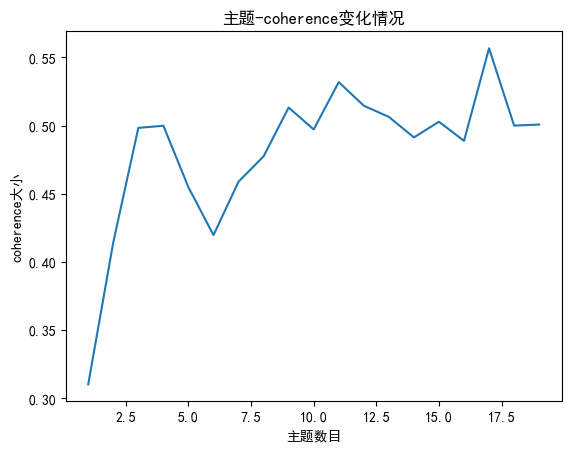

In [19]:
x = range(1,20)
# z = [perplexity(i) for i in x]  #如果想用困惑度就选这个
y = [coherence(i) for i in x]
plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('coherence大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-coherence变化情况')
plt.show()

In [11]:
x = range(1,8)
y = [perplexity(i) for i in x]  #如果想用困惑度就选这个
plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('perplexity大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-perplexity变化情况')
plt.show()

[(0, '0.032*"李佳琦" + 0.012*"\u200b" + 0.012*"不" + 0.010*"都" + 0.009*"花西子" + 0.008*"说" + 0.008*"人" + 0.006*"道歉" + 0.006*"直播" + 0.006*"努力" + 0.005*"收起" + 0.005*"d" + 0.005*"直播间" + 0.005*"视频" + 0.004*"会"')]
-7.967861394435848


KeyboardInterrupt: 

In [12]:
from gensim.models import LdaModel
import pandas as pd
from gensim.corpora import Dictionary
from gensim import corpora, models
import csv
 
# 准备数据
PATH = "D:/python/lda/data/data_output.csv"
 
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
 
dictionary = corpora.Dictionary(data_set)  # 构建词典
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    print(i[bz][0])

[(0, '0.117*"ㅤ" + 0.008*"发疯" + 0.005*"纯" + 0.003*"极" + 0.002*"头像" + 0.002*"晕" + 0.002*"薛高" + 0.002*"钟" + 0.002*"老子" + 0.002*"考试"'), (1, '0.040*"医生" + 0.027*"收入" + 0.011*"都" + 0.010*"人" + 0.010*"提高" + 0.008*"上海" + 0.007*"希望" + 0.007*"中国" + 0.006*"社会" + 0.006*"努力"'), (2, '0.074*"万" + 0.048*"掉粉" + 0.026*"粉丝" + 0.025*"掉" + 0.018*"\u200b" + 0.016*"100" + 0.011*"李佳琦" + 0.010*"超" + 0.010*"508" + 0.007*"一天"'), (3, '0.097*"李佳琦" + 0.052*"\u200b" + 0.034*"道歉" + 0.023*"哭" + 0.020*"视频" + 0.019*"微博" + 0.018*"不" + 0.014*"说" + 0.013*"直播间" + 0.013*"大家"'), (4, '0.025*"李佳琦" + 0.017*"不" + 0.016*"都" + 0.016*"人" + 0.013*"说" + 0.010*"努力" + 0.009*"会" + 0.008*"不是" + 0.008*"收起" + 0.008*"d"'), (5, '0.026*"胡锡进" + 0.020*"上架" + 0.013*"400" + 0.011*"12" + 0.010*"老胡" + 0.008*"应" + 0.006*"八成" + 0.006*"秒" + 0.004*"胡老" + 0.004*"LV"'), (6, '0.049*"花西子" + 0.025*"李佳琦" + 0.024*"国货" + 0.023*"眉笔" + 0.019*"元" + 0.016*"79" + 0.015*"品牌" + 0.014*"网友" + 0.011*"回应" + 0.010*"月"'), (7, '0.152*"…" + 0.010*"80" + 0.007*"\u200b" + 0.006

4
3
3
4
6
8
6
4
3
9
4
3
4
4
4
4
4
4
4
4
4
8
4
4
4
4
4
3
4
4
3
4
4
4
4
3
4
4
4
4
4
4
3
4
4
3
4
3
6
4
4
3
3
4
3
3
3
3
3
9
4
4
9
6
8
4
3
4
4
4
4
4
4
4
8
4
4
9
4
9
4
3
4
6
3
3
4
4
1
4
4
3
4
4
4
4
4
4
3
4
4
6
3
4
9
4
4
8
4
6
4
4
4
3
3
4
6
8
4
4
3
4
4
4
4
4
4
4
4
4
3
6
3
3
3
3
3
4
9
4
3
4
4
4
3
4
4
4
4
4
3
4
6
6
4
3
3
4
8
4
4
4
0
6
4
4
4
4
4
4
4
4
3
3
9
3
4
4
3
4
4
1
3
4
2
4
9
2
4
3
4
3
3
9
6
3
3
8
4
4
4
4
3
3
4
4
4
4
4
3
4
3
4
4
6
6
9
4
4
6
8
3
3
6
4
3
3
3
7
4
4
3
3
8
4
3
3
4
4
4
6
4
6
4
4
3
4
4
4
2
8
4
3
2
3
4
6
4
4
3
9
4
3
3
4
6
4
9
1
3
4
3
4
4
4
4
3
4
8
4
4
3
2
2
4
3
4
6
8
3
6
4
4
6
6
6
6
6
3
4
3
6
6
4
6
4
4
4
4
4
3
6
6
6
6
4
3
6
3
3
4
4
3
3
4
4
4
4
3
4
3
3
4
3
3
4
3
4
4
8
3
4
6
3
3
4
4
3
0
3
4
9
4
4
4
6
3
6
4
4
4
6
4
4
4
4
4
3
4
4
4
1
6
4
4
3
3
3
4
3
3
3
4
3
6
3
4
3
4
3
4
4
4
4
4
3
4
4
4
4
3
4
3
4
4
3
4
4
3
3
4
3
4
4
3
4
4
4
4
8
6
4
4
4
4
4
4
4
4
3
4
4
6
9
4
3
4
4
4
4
8
4
3
4
6
3
3
4
4
3
4
4
4
6
4
4
4
3
3
3
6
5
4
4
4
4
4
3
4
4
4
4
4
4
2
3
4
4
4
4
4
4
4
4
4
3
4
4
3
4
4
7
9
4
4
4
4
2
3
3


In [32]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [37]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
warnings.filterwarnings('ignore', category=FutureWarning) 
warnings.filterwarnings('ignore', category=UserWarning)

In [38]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

In [42]:
conda update scikit-learn

^C

Note: you may need to restart the kernel to use updated packages.


In [41]:
#pyLDAvis.save_html(data, 'D:/python/lda/result/result.html')

import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda, corpus, dictionary)

AttributeError: 'Dictionary' object has no attribute 'get_feature_names_out'